# **Alzheimers Disease Prediction on Patient**

Hello Everyone!! My name is Pilar Kukuh Bintang Rachmadi, and I'm from [Sukabumi Regency, West Java Indonesia](https://maps.app.goo.gl/e5yMiHtYADQPf4yP8)

Here I want to do some test on many common Classification Alghorithm to detect alzhemier disease on some patient based on their medical history and alzheimer status

The dataset I used in this test was taken from [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data)

The details of this test will be published on my Medium Story as soon as possible. There I will tell you how the workflow and results briefly based on the CRISP-DM Cycle.

Thank You

In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", None)

# **A. Data Preparation**

## **1. Load Dataset**

In [2]:
df = pd.read_csv('../Chapter 2 - Data Preprocessing/alzheimers_disease_data.csv', index_col='PatientID')
df

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
PatientID                                                               
4751        73       0          0               2  22.927749        0   
4752        89       0          0               0  26.827681        0   
4753        73       0          3               1  17.795882        0   
4754        74       1          0               1  33.800817        1   
4755        89       0          0               0  20.716974        0   
...        ...     ...        ...             ...        ...      ...   
6895        61       0          0               1  39.121757        0   
6896        75       0          0               2  17.857903        0   
6897        77       0          0               1  15.476479        0   
6898        78       1          3               1  15.299911        0   
6899        72       0          0               2  33.289738        0   

           AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
PatientID                                                                    
4751                13.297218          6.327112     1.347214      9.025679   
4752                 4.542524          7.619885     0.518767      7.151293   
4753                19.555085          7.844988     1.826335      9.673574   
4754                12.209266          8.428001     7.435604      8.392554   
4755                18.454356          6.310461     0.795498      5.597238   
...                       ...               ...          ...           ...   
6895                 1.561126          4.049964     6.555306      7.535540   
6896                18.767261          1.360667     2.904662      8.555256   
6897                 4.594670          9.886002     8.120025      5.769464   
6898                 8.674505          6.354282     1.263427      8.322874   
6899                 7.890703          6.570993     7.941404      9.878711   

           FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  \
PatientID                                                             
4751                             0                      0         1   
4752                             0                      0         0   
4753                             1                      0         0   
4754                             0                      0         0   
4755                             0                      0         0   
...                            ...                    ...       ...   
6895                             0                      0         0   
6896                             0                      0         0   
6897                             0                      0         0   
6898                             0                      1         0   
6899                             0                      0         0   

           Depression  HeadInjury  Hypertension  SystolicBP  DiastolicBP  \
PatientID                                                                  
4751                1           0             0         142           72   
4752                0           0             0         115           64   
4753                0           0             0          99          116   
4754                0           0             0         118          115   
4755                0           0             0          94          117   
...               ...         ...           ...         ...          ...   
6895                0           0             0         122          101   
6896                0           0             0         152          106   
6897                0           0             0         115          118   
6898                0           0             0         103           96   
6899                0           0             0         166           78   

           CholesterolTotal  CholesterolLDL  CholesterolHDL  \
PatientID                                                     
4751   

## **2. Describe Dataset**

In [3]:
df.describe()

Age       Gender    Ethnicity  EducationLevel          BMI  \
count  2149.000000  2149.000000  2149.000000     2149.000000  2149.000000   
mean     74.908795     0.506282     0.697534        1.286645    27.655697   
std       8.990221     0.500077     0.996128        0.904527     7.217438   
min      60.000000     0.000000     0.000000        0.000000    15.008851   
25%      67.000000     0.000000     0.000000        1.000000    21.611408   
50%      75.000000     1.000000     0.000000        1.000000    27.823924   
75%      83.000000     1.000000     1.000000        2.000000    33.869778   
max      90.000000     1.000000     3.000000        3.000000    39.992767   

           Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  2149.000000         2149.000000       2149.000000  2149.000000   
mean      0.288506           10.039442          4.920202     4.993138   
std       0.453173            5.757910          2.857191     2.909055   
min       0.000000            0.002003          0.003616     0.009385   
25%       0.000000            5.139810          2.570626     2.458455   
50%       0.000000            9.934412          4.766424     5.076087   
75%       1.000000           15.157931          7.427899     7.558625   
max       1.000000           19.989293          9.987429     9.998346   

       SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
count   2149.000000              2149.000000            2149.000000   
mean       7.051081                 0.252210               0.144253   
std        1.763573                 0.434382               0.351428   
min        4.002629                 0.000000               0.000000   
25%        5.482997                 0.000000               0.000000   
50%        7.115646                 0.000000               0.000000   
75%        8.562521                 1.000000               0.000000   
max        9.999840                 1.000000               1.000000   

          Diabetes   Depression   HeadInjury  Hypertension   SystolicBP  \
count  2149.000000  2149.000000  2149.000000   2149.000000  2149.000000   
mean      0.150768     0.200558     0.092601      0.148906   134.264774   
std       0.357906     0.400511     0.289940      0.356079    25.949352   
min       0.000000     0.000000     0.000000      0.000000    90.000000   
25%       0.000000     0.000000     0.000000      0.000000   112.000000   
50%       0.000000     0.000000     0.000000      0.000000   134.000000   
75%       0.000000     0.000000     0.000000      0.000000   157.000000   
max       1.000000     1.000000     1.000000      1.000000   179.000000   

       DiastolicBP  CholesterolTotal  CholesterolLDL  CholesterolHDL  \
count  2149.000000       2149.000000     2149.000000     2149.000000   
mean     89.847836        225.197519      124.335944       59.463533   
std      17.592496         42.542233       43.366584       23.139174   
min      60.000000        150.093316       50.230707       20.003434   
25%      74.000000        190.252963       87.195798       39.095698   
50%      91.000000        225.086430      123.342593       59.768237   
75%     105.000000        262.031657      161.733733       78.939050   
max     119.000000        299.993352      199.965665       99.980324   

       CholesterolTriglycerides         MMSE  FunctionalAssessment  \
count               2149.000000  2149.000000           2149.000000   
mean                 228.281496    14.755132              5.080055   
std                  101.986721     8.613151              2.892743   
min                   50.407194     0.005312              0.000460   
25%                  137.583222     7.167602              2.566281   
50%                  230.301983    14.441660              5.094439   
75%                  314.839046    22.161028              7.546981   
max                  399.941862    29.991381              9.996467   

       MemoryComplaints  BehavioralProblems          ADL    Confusi

## **3. Detail of the Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 4751 to 6899
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64  

## **4. Checking Missing Values**

In [5]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

## **5. Drop Duplicate on Dataset**

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
PatientID                                                               
4751        73       0          0               2  22.927749        0   
4752        89       0          0               0  26.827681        0   
4753        73       0          3               1  17.795882        0   
4754        74       1          0               1  33.800817        1   
4755        89       0          0               0  20.716974        0   
...        ...     ...        ...             ...        ...      ...   
6895        61       0          0               1  39.121757        0   
6896        75       0          0               2  17.857903        0   
6897        77       0          0               1  15.476479        0   
6898        78       1          3               1  15.299911        0   
6899        72       0          0               2  33.289738        0   

           AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
PatientID                                                                    
4751                13.297218          6.327112     1.347214      9.025679   
4752                 4.542524          7.619885     0.518767      7.151293   
4753                19.555085          7.844988     1.826335      9.673574   
4754                12.209266          8.428001     7.435604      8.392554   
4755                18.454356          6.310461     0.795498      5.597238   
...                       ...               ...          ...           ...   
6895                 1.561126          4.049964     6.555306      7.535540   
6896                18.767261          1.360667     2.904662      8.555256   
6897                 4.594670          9.886002     8.120025      5.769464   
6898                 8.674505          6.354282     1.263427      8.322874   
6899                 7.890703          6.570993     7.941404      9.878711   

           FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  \
PatientID                                                             
4751                             0                      0         1   
4752                             0                      0         0   
4753                             1                      0         0   
4754                             0                      0         0   
4755                             0                      0         0   
...                            ...                    ...       ...   
6895                             0                      0         0   
6896                             0                      0         0   
6897                             0                      0         0   
6898                             0                      1         0   
6899                             0                      0         0   

           Depression  HeadInjury  Hypertension  SystolicBP  DiastolicBP  \
PatientID                                                                  
4751                1           0             0         142           72   
4752                0           0             0         115           64   
4753                0           0             0          99          116   
4754                0           0             0         118          115   
4755                0           0             0          94          117   
...               ...         ...           ...         ...          ...   
6895                0           0             0         122          101   
6896                0           0             0         152          106   
6897                0           0             0         115          118   
6898                0           0             0         103           96   
6899                0           0             0         166           78   

           CholesterolTotal  CholesterolLDL  CholesterolHDL  \
PatientID                                                     
4751   

## **6. Drop Unecessary Columns**

>*From the results of the temporary preparation of the dataset, we see that the DoctorInCharge column does not mean anything to the other columns and values from the first row to the end because the purpose of this dataset is to detect alzheimer's disease in patients that served by Doctor XXXConfid, therefore we just drop the 'DoctorInCharge' column.*

In [8]:
df.drop(columns=['DoctorInCharge'], inplace=True)

## **7. Value Inspection on Each Columns**

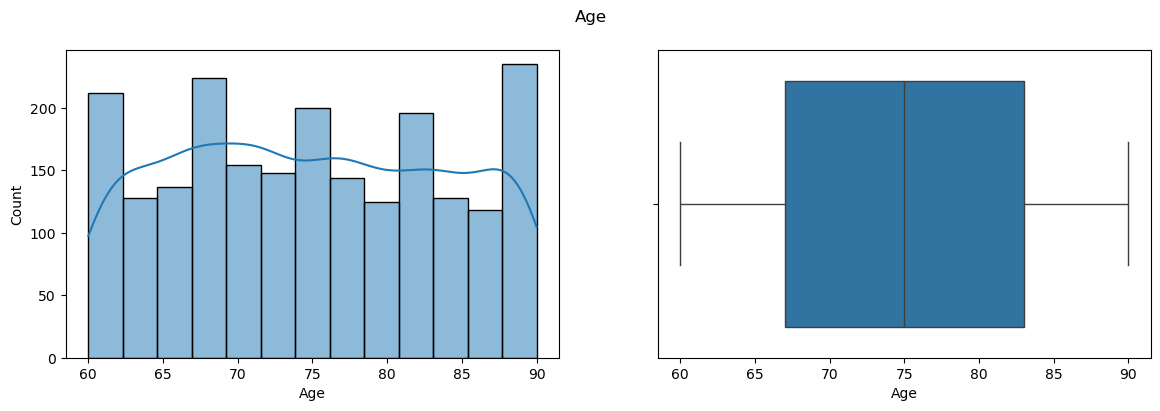

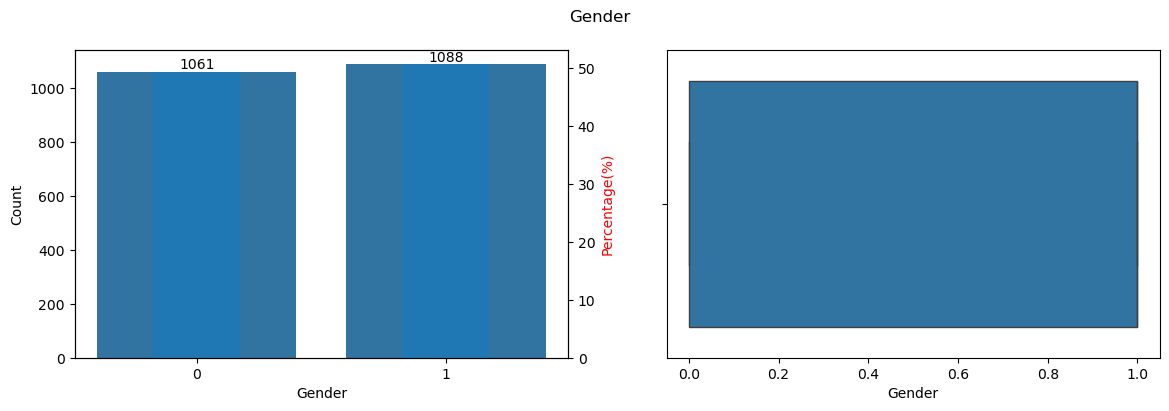

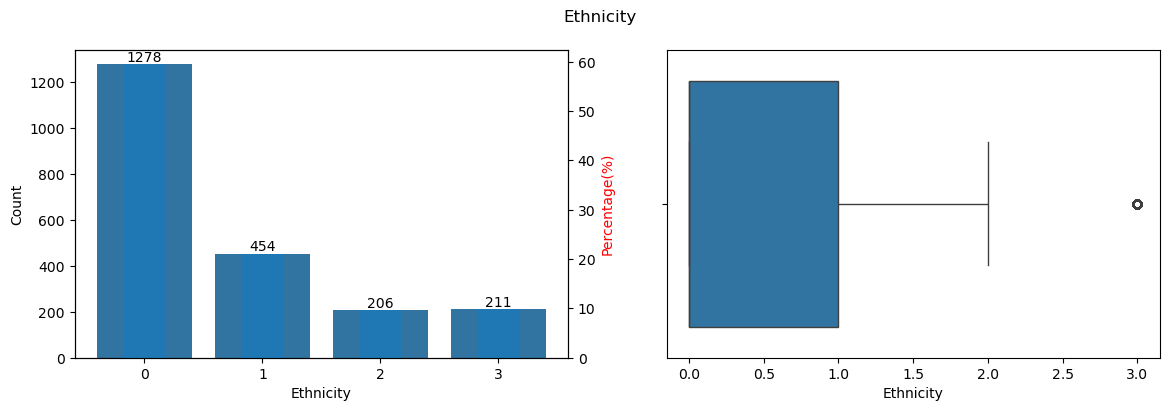

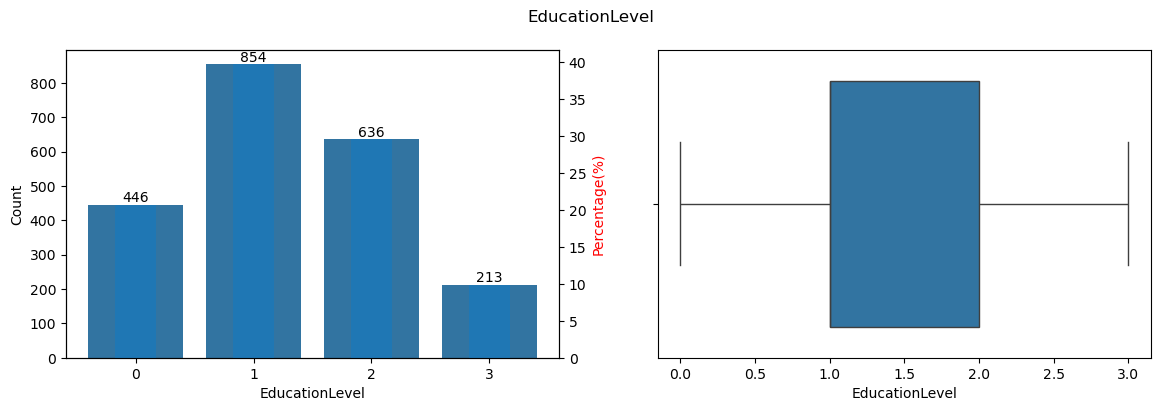

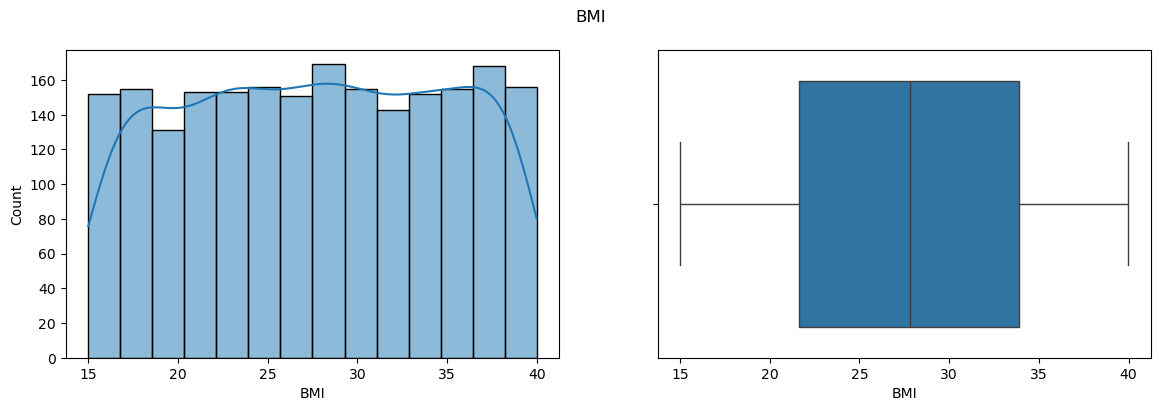

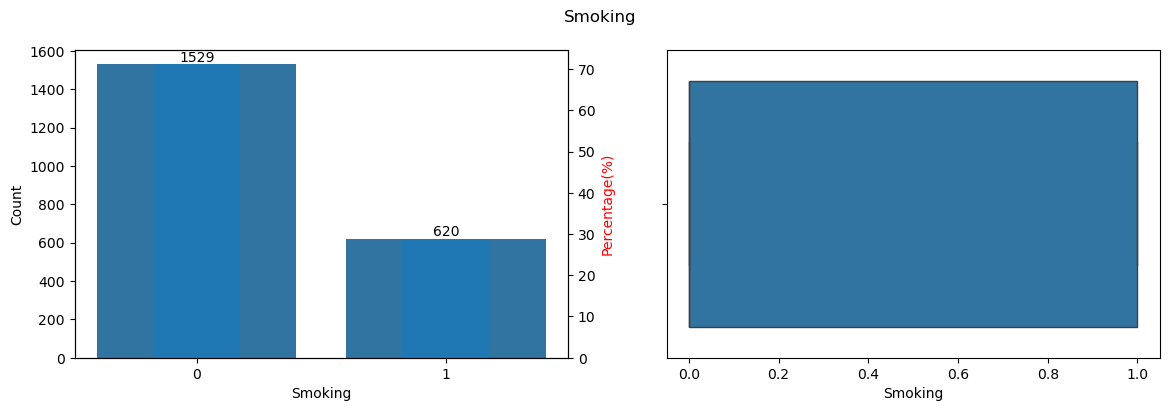

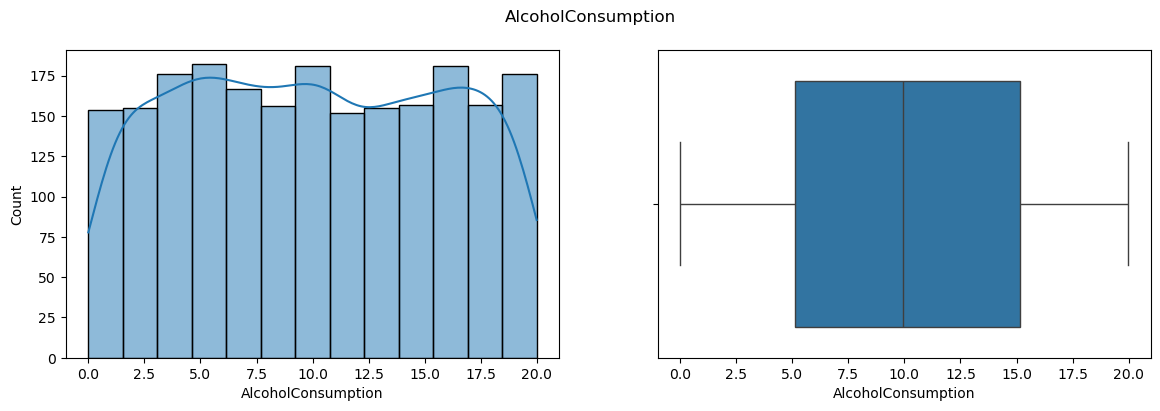

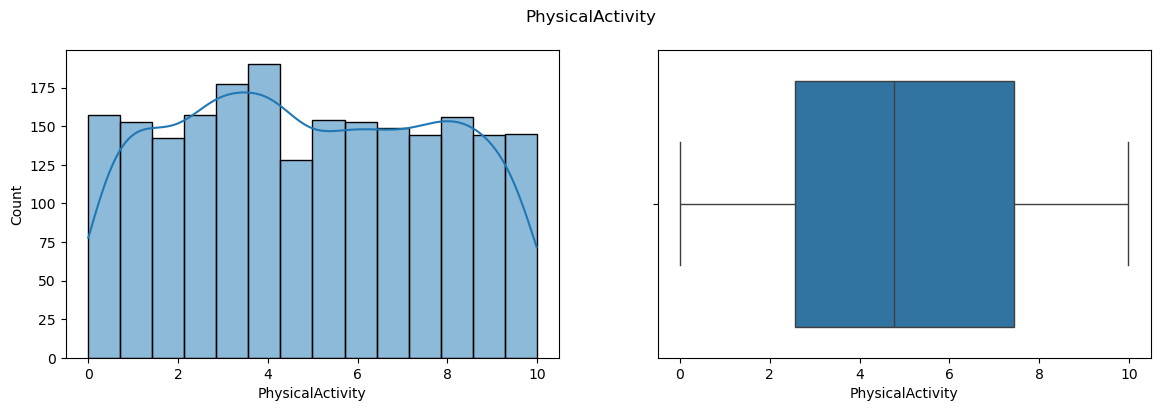

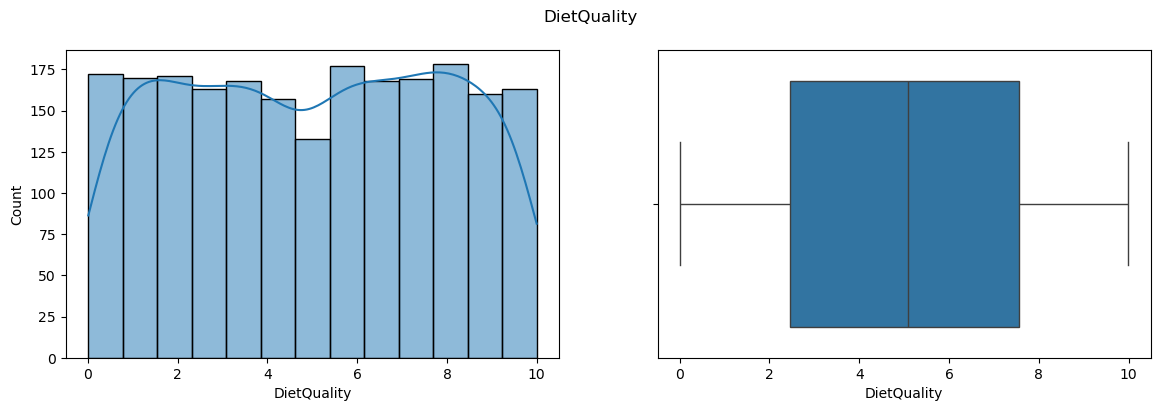

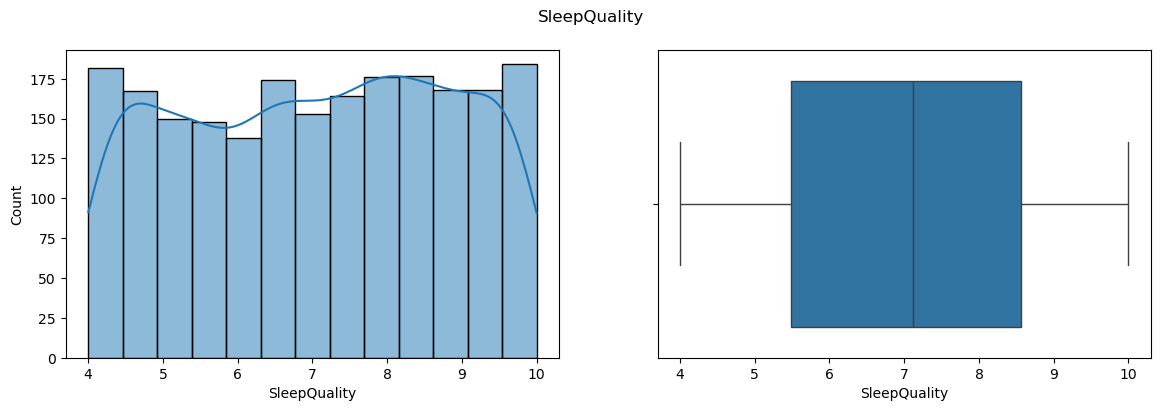

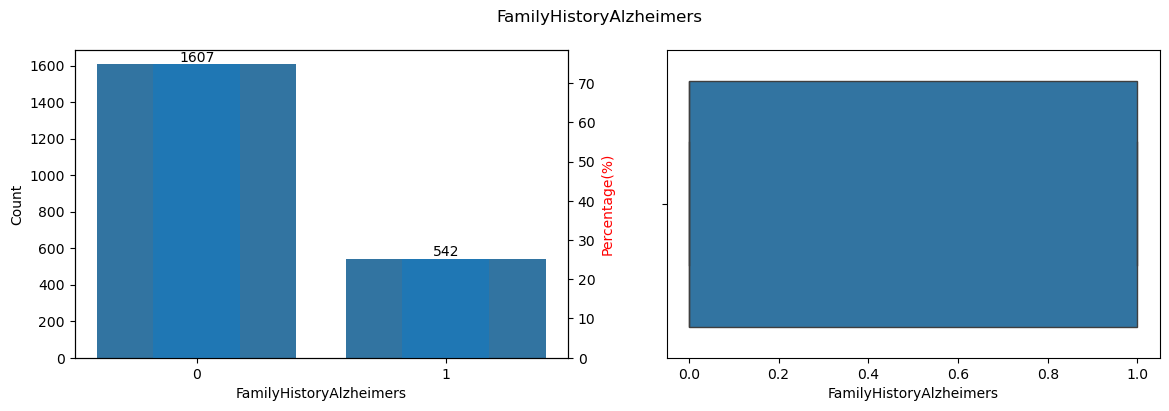

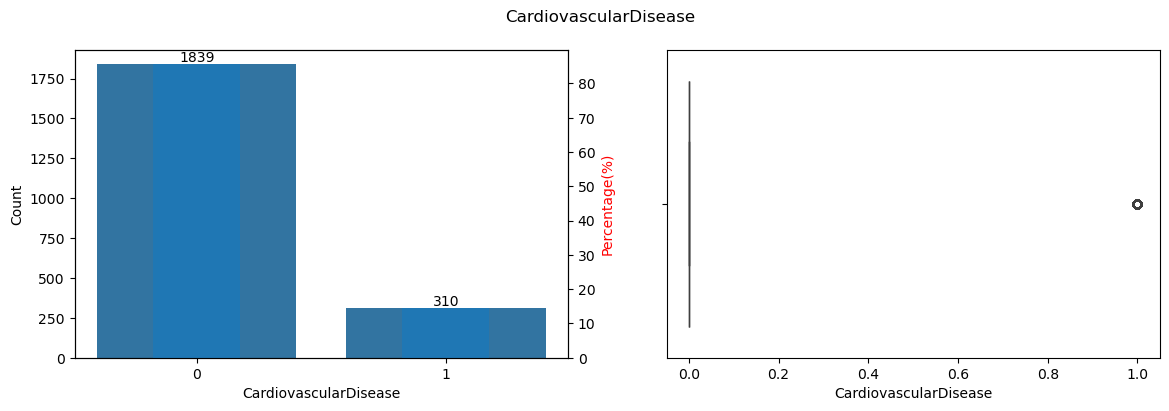

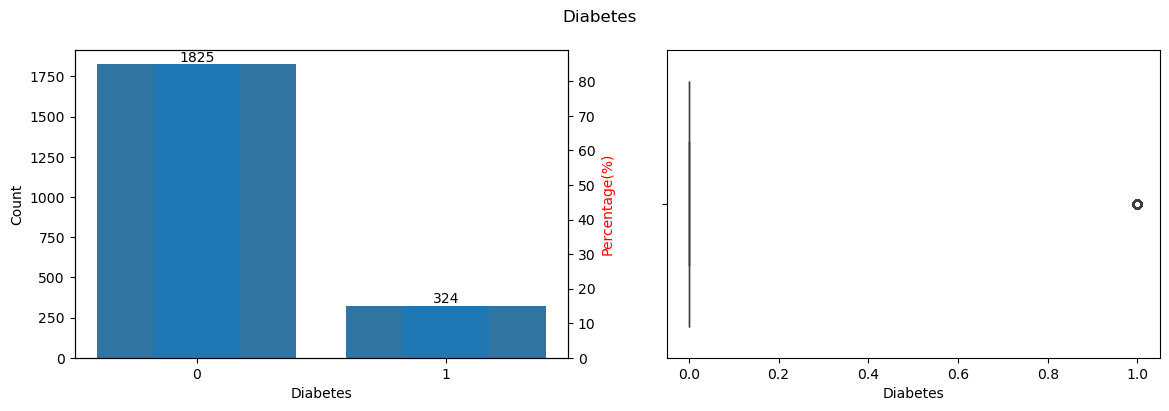

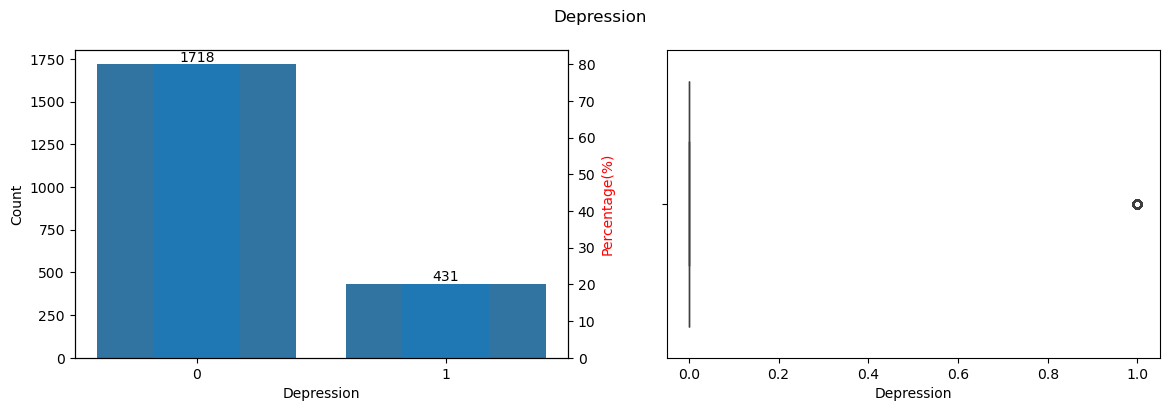

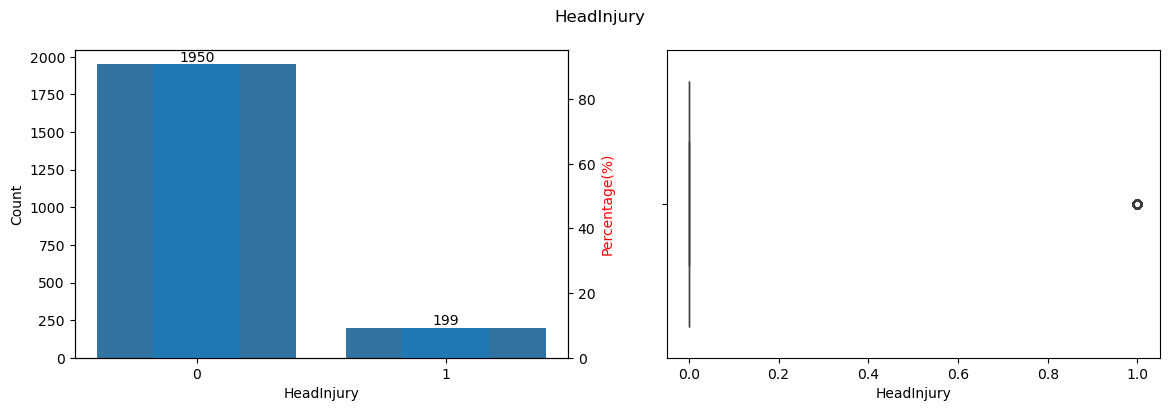

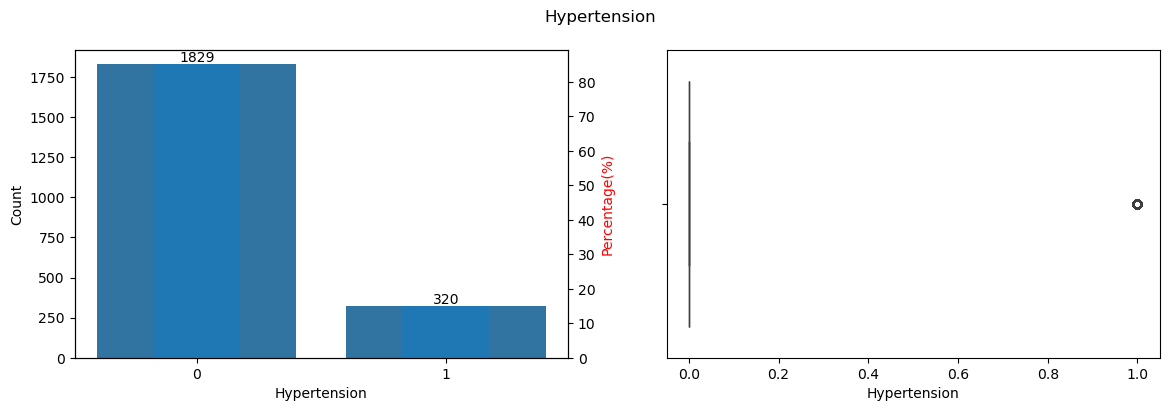

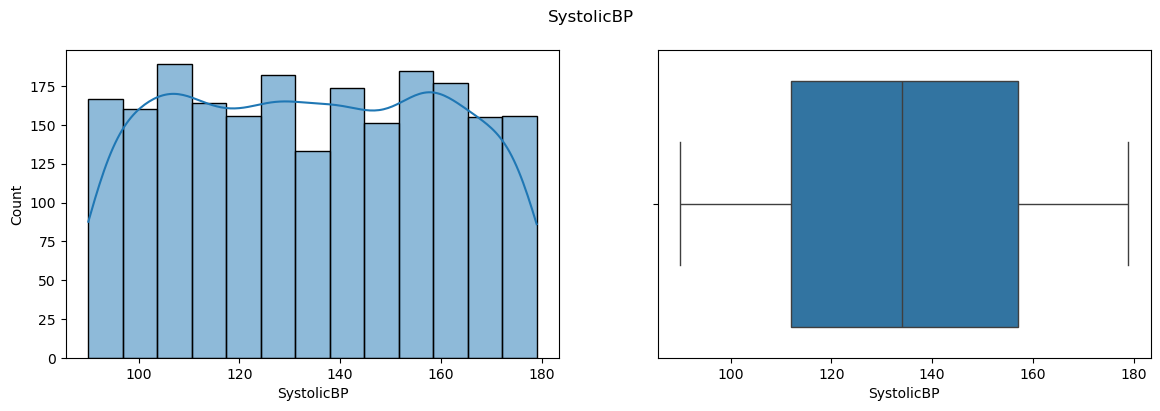

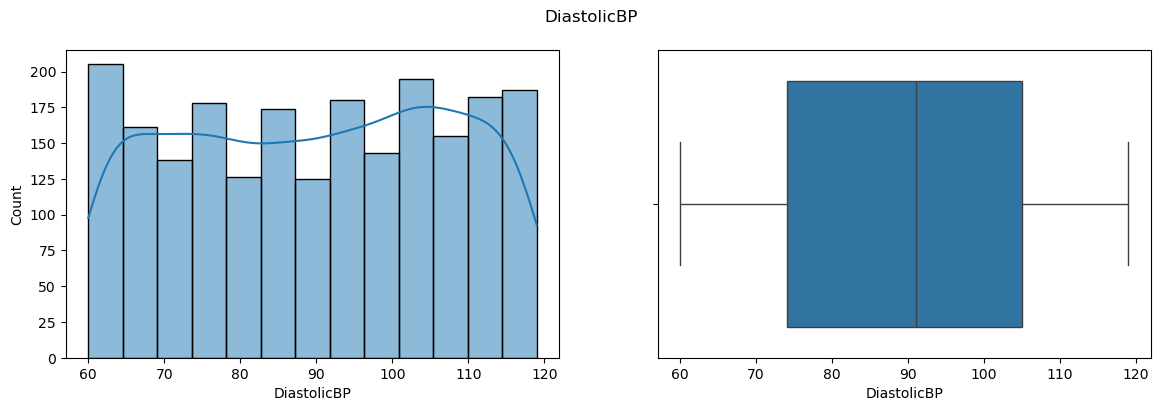

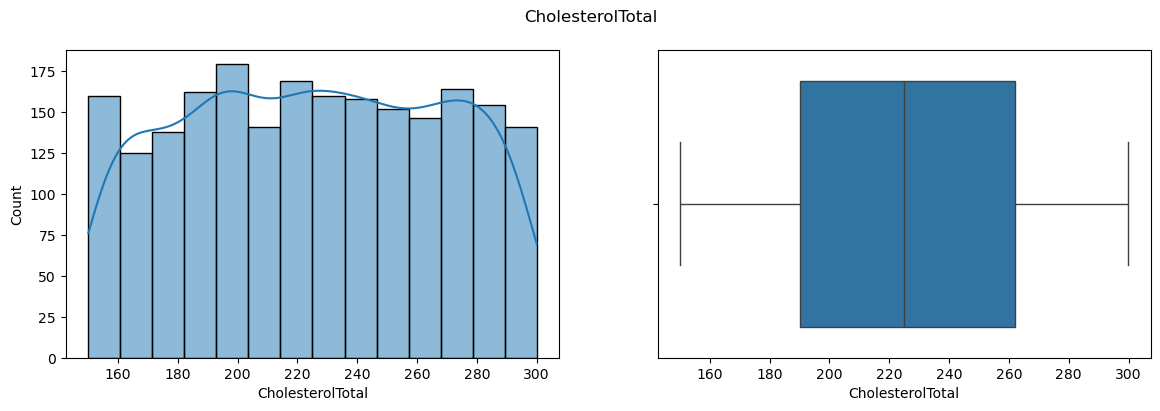

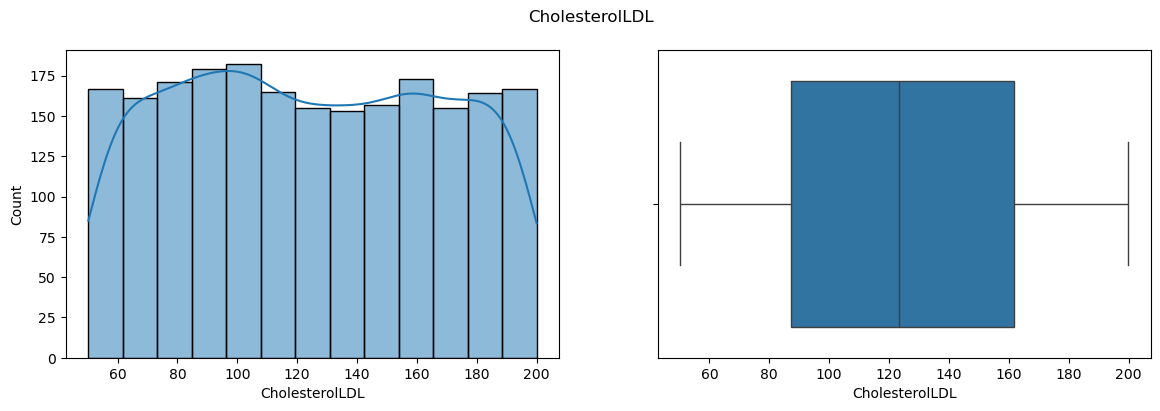

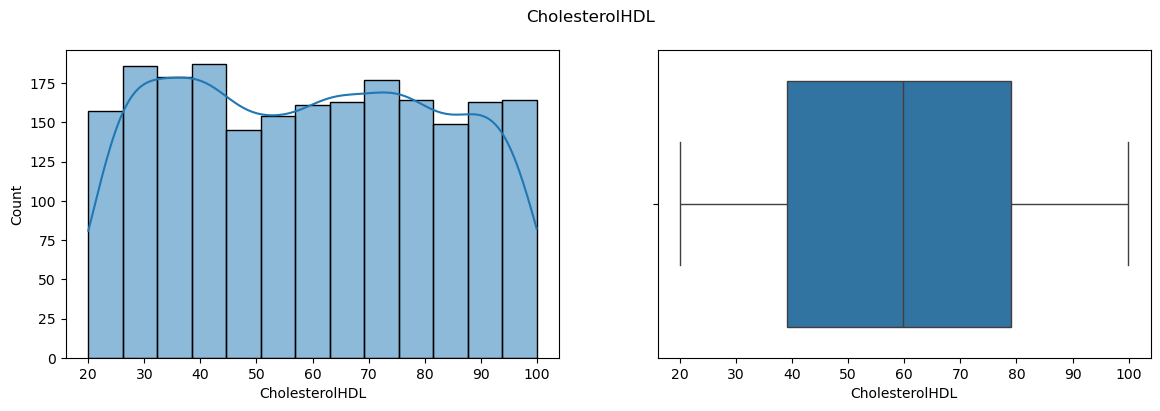

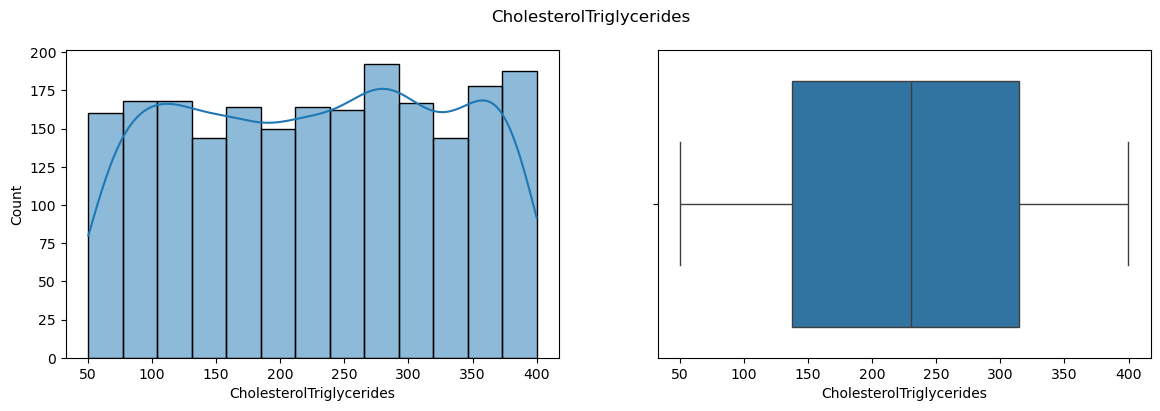

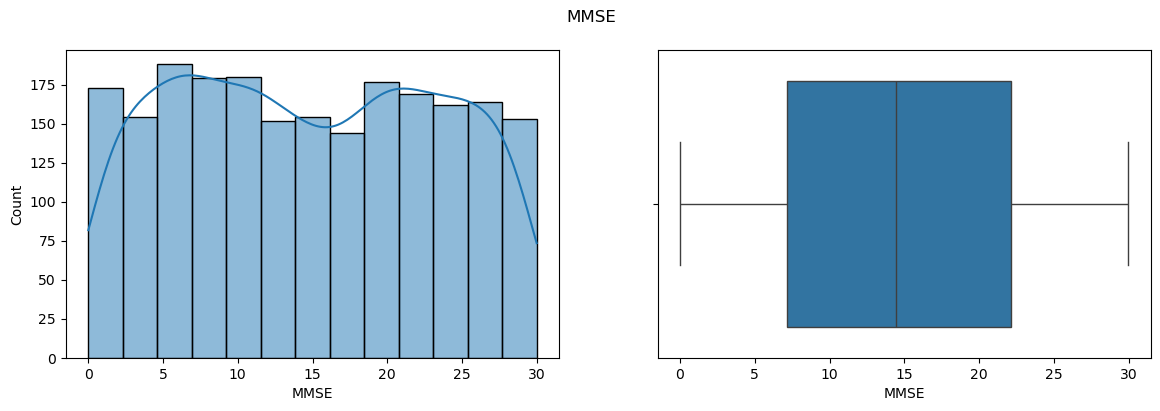

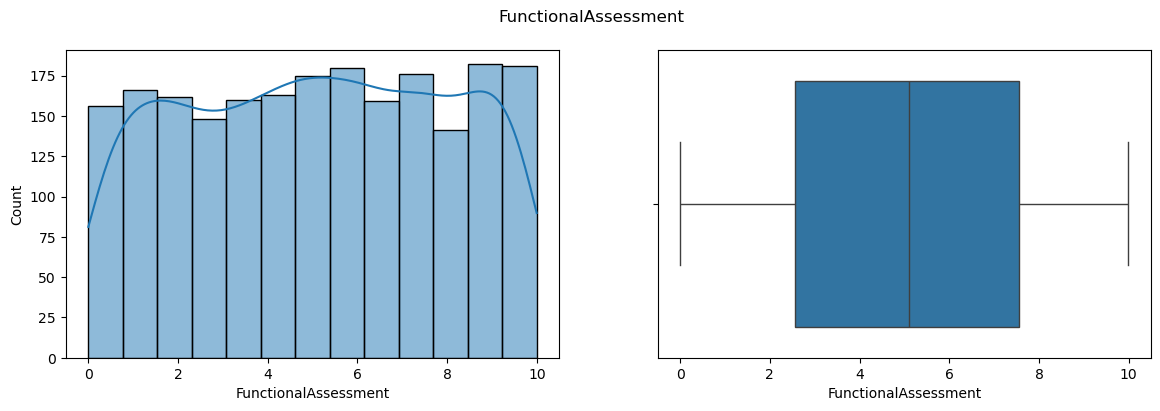

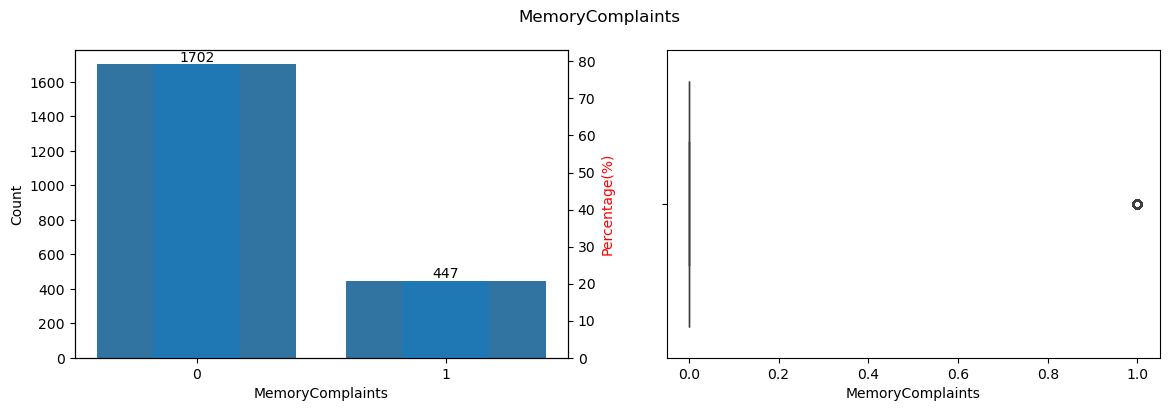

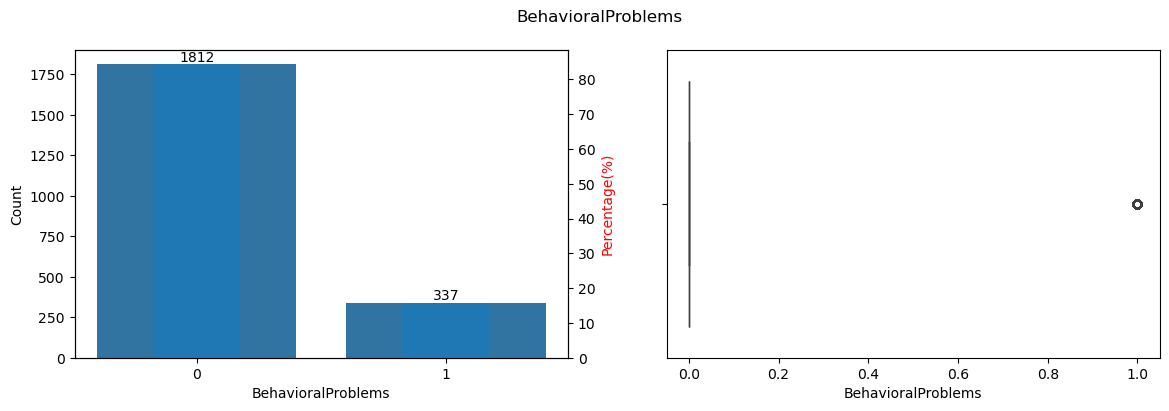

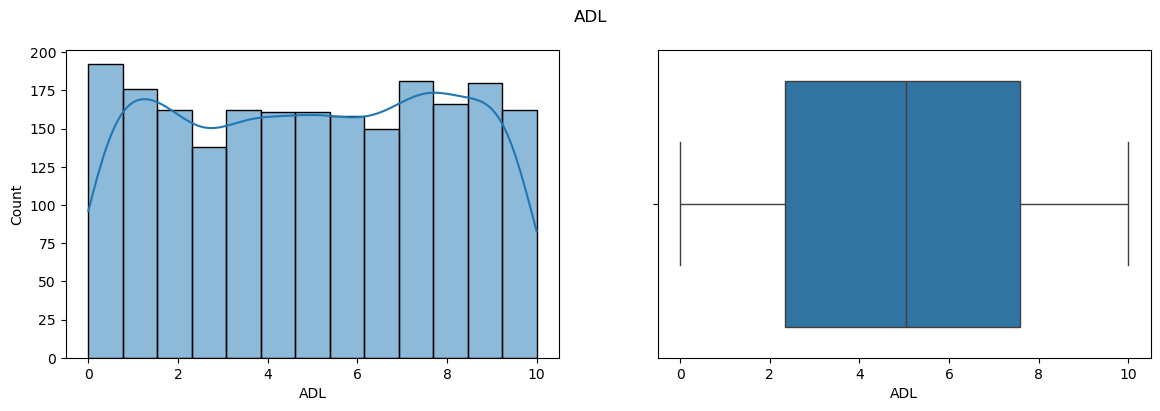

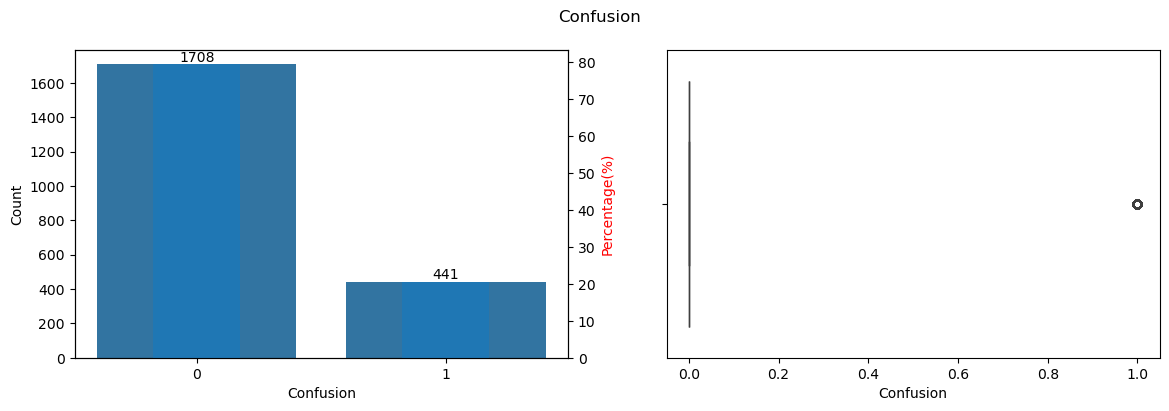

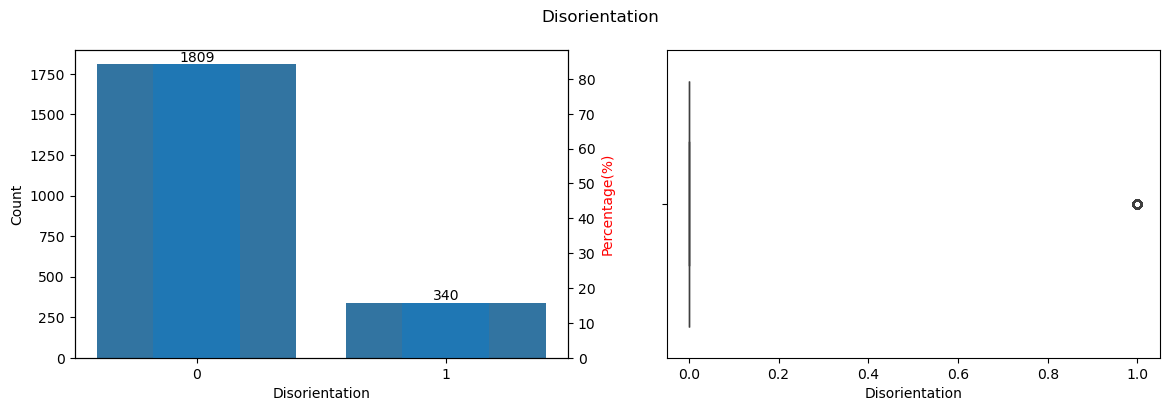

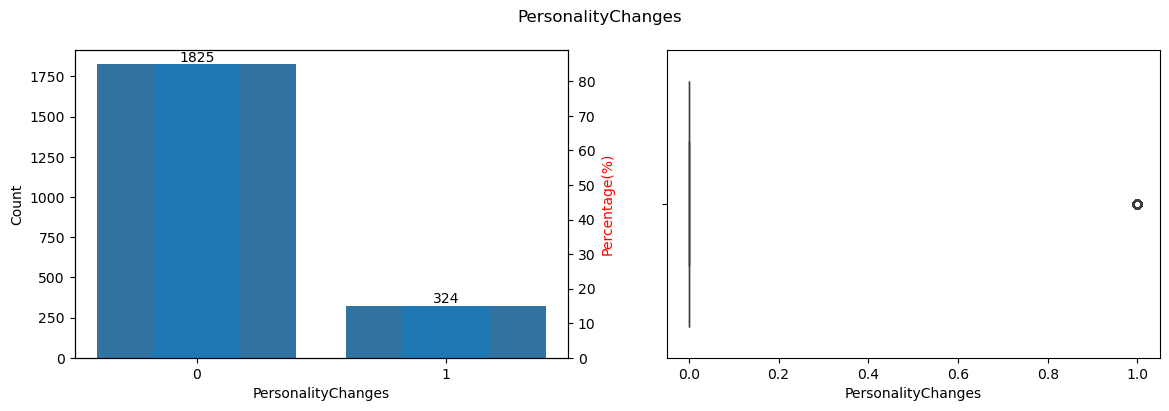

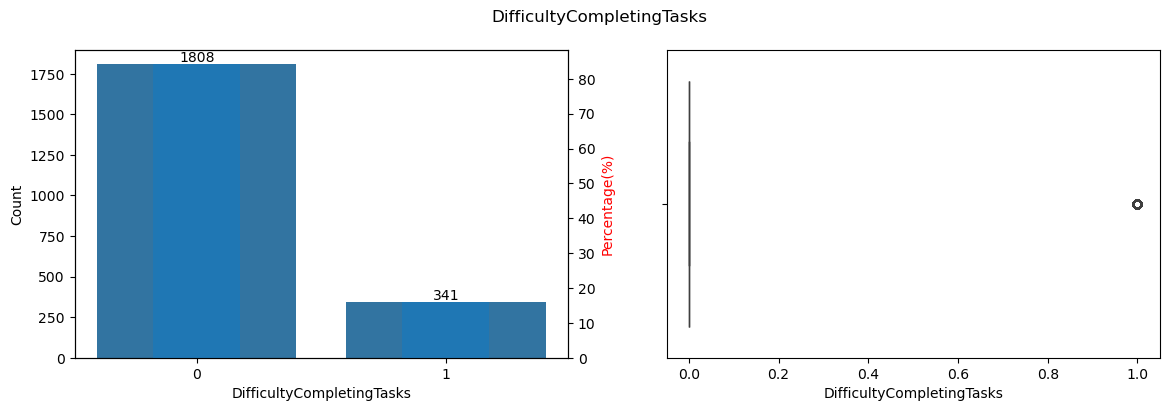

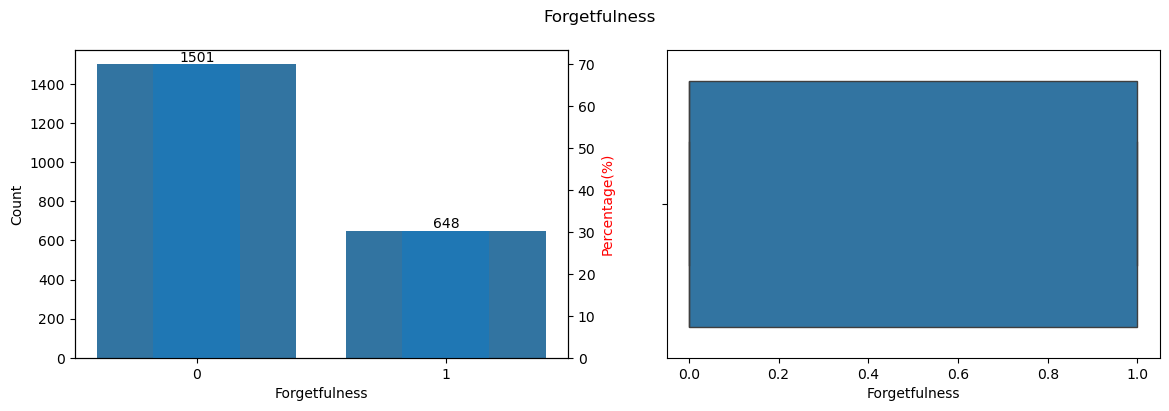

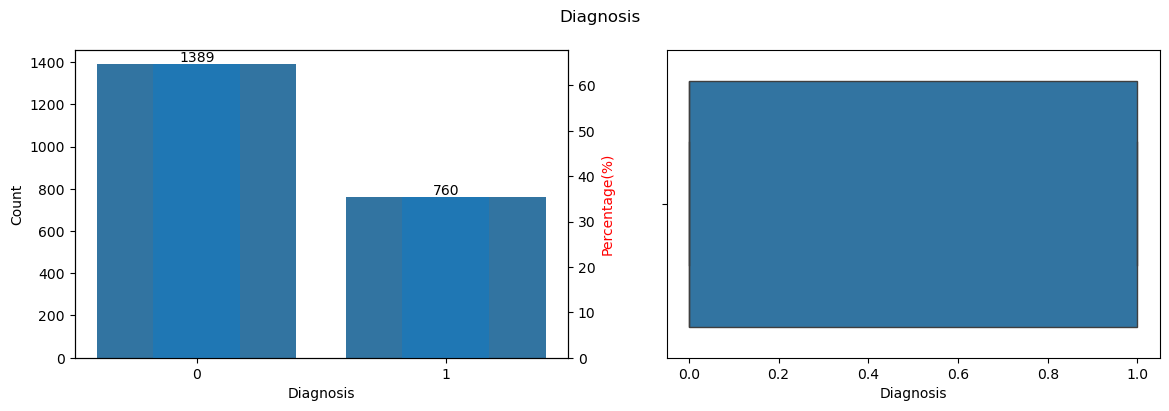

In [9]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
for col in numeric_cols:
  fig, axes = plt.subplots(1, 2, figsize=(14, 4))

  if df[col].nunique() <= 5:
    grouped = df[col].value_counts().sort_index()
    width = 0.35  # Adjust bar width for better visibility

    # Primary y-axis (count)
    sns.countplot(data=df, x=f'{col}', ax=axes[0])
    axes[0].set_ylabel('Count', color="black")

    # Secondary y-axis (percentage)
    ax2 = axes[0].twinx()
    percentage = (grouped / len(df)) * 100
    ax2.bar(grouped.index, percentage, width=width)
    ax2.set_ylabel('Percentage(%)', color="red")

    # Text labels for both axes
    for index, value in enumerate(grouped):
      axes[0].text(index, value, str(value), ha='center', va='bottom')

  # Continuous data (more than 5 unique values)
  else:
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)  # Kernel Density Estimation
  sns.boxplot(data=df, x=col, ax=axes[1])

  # Title for the entire figure
  fig.suptitle(f"{col}")
  plt.show()

>*Here we find data imbalance in the `HeadInjury` column but we will ignore it because our initial goal here is to predict someone getting alzheimer`s.*

# **B. Exploratory Data Analysis**

## **1. Heatmap**

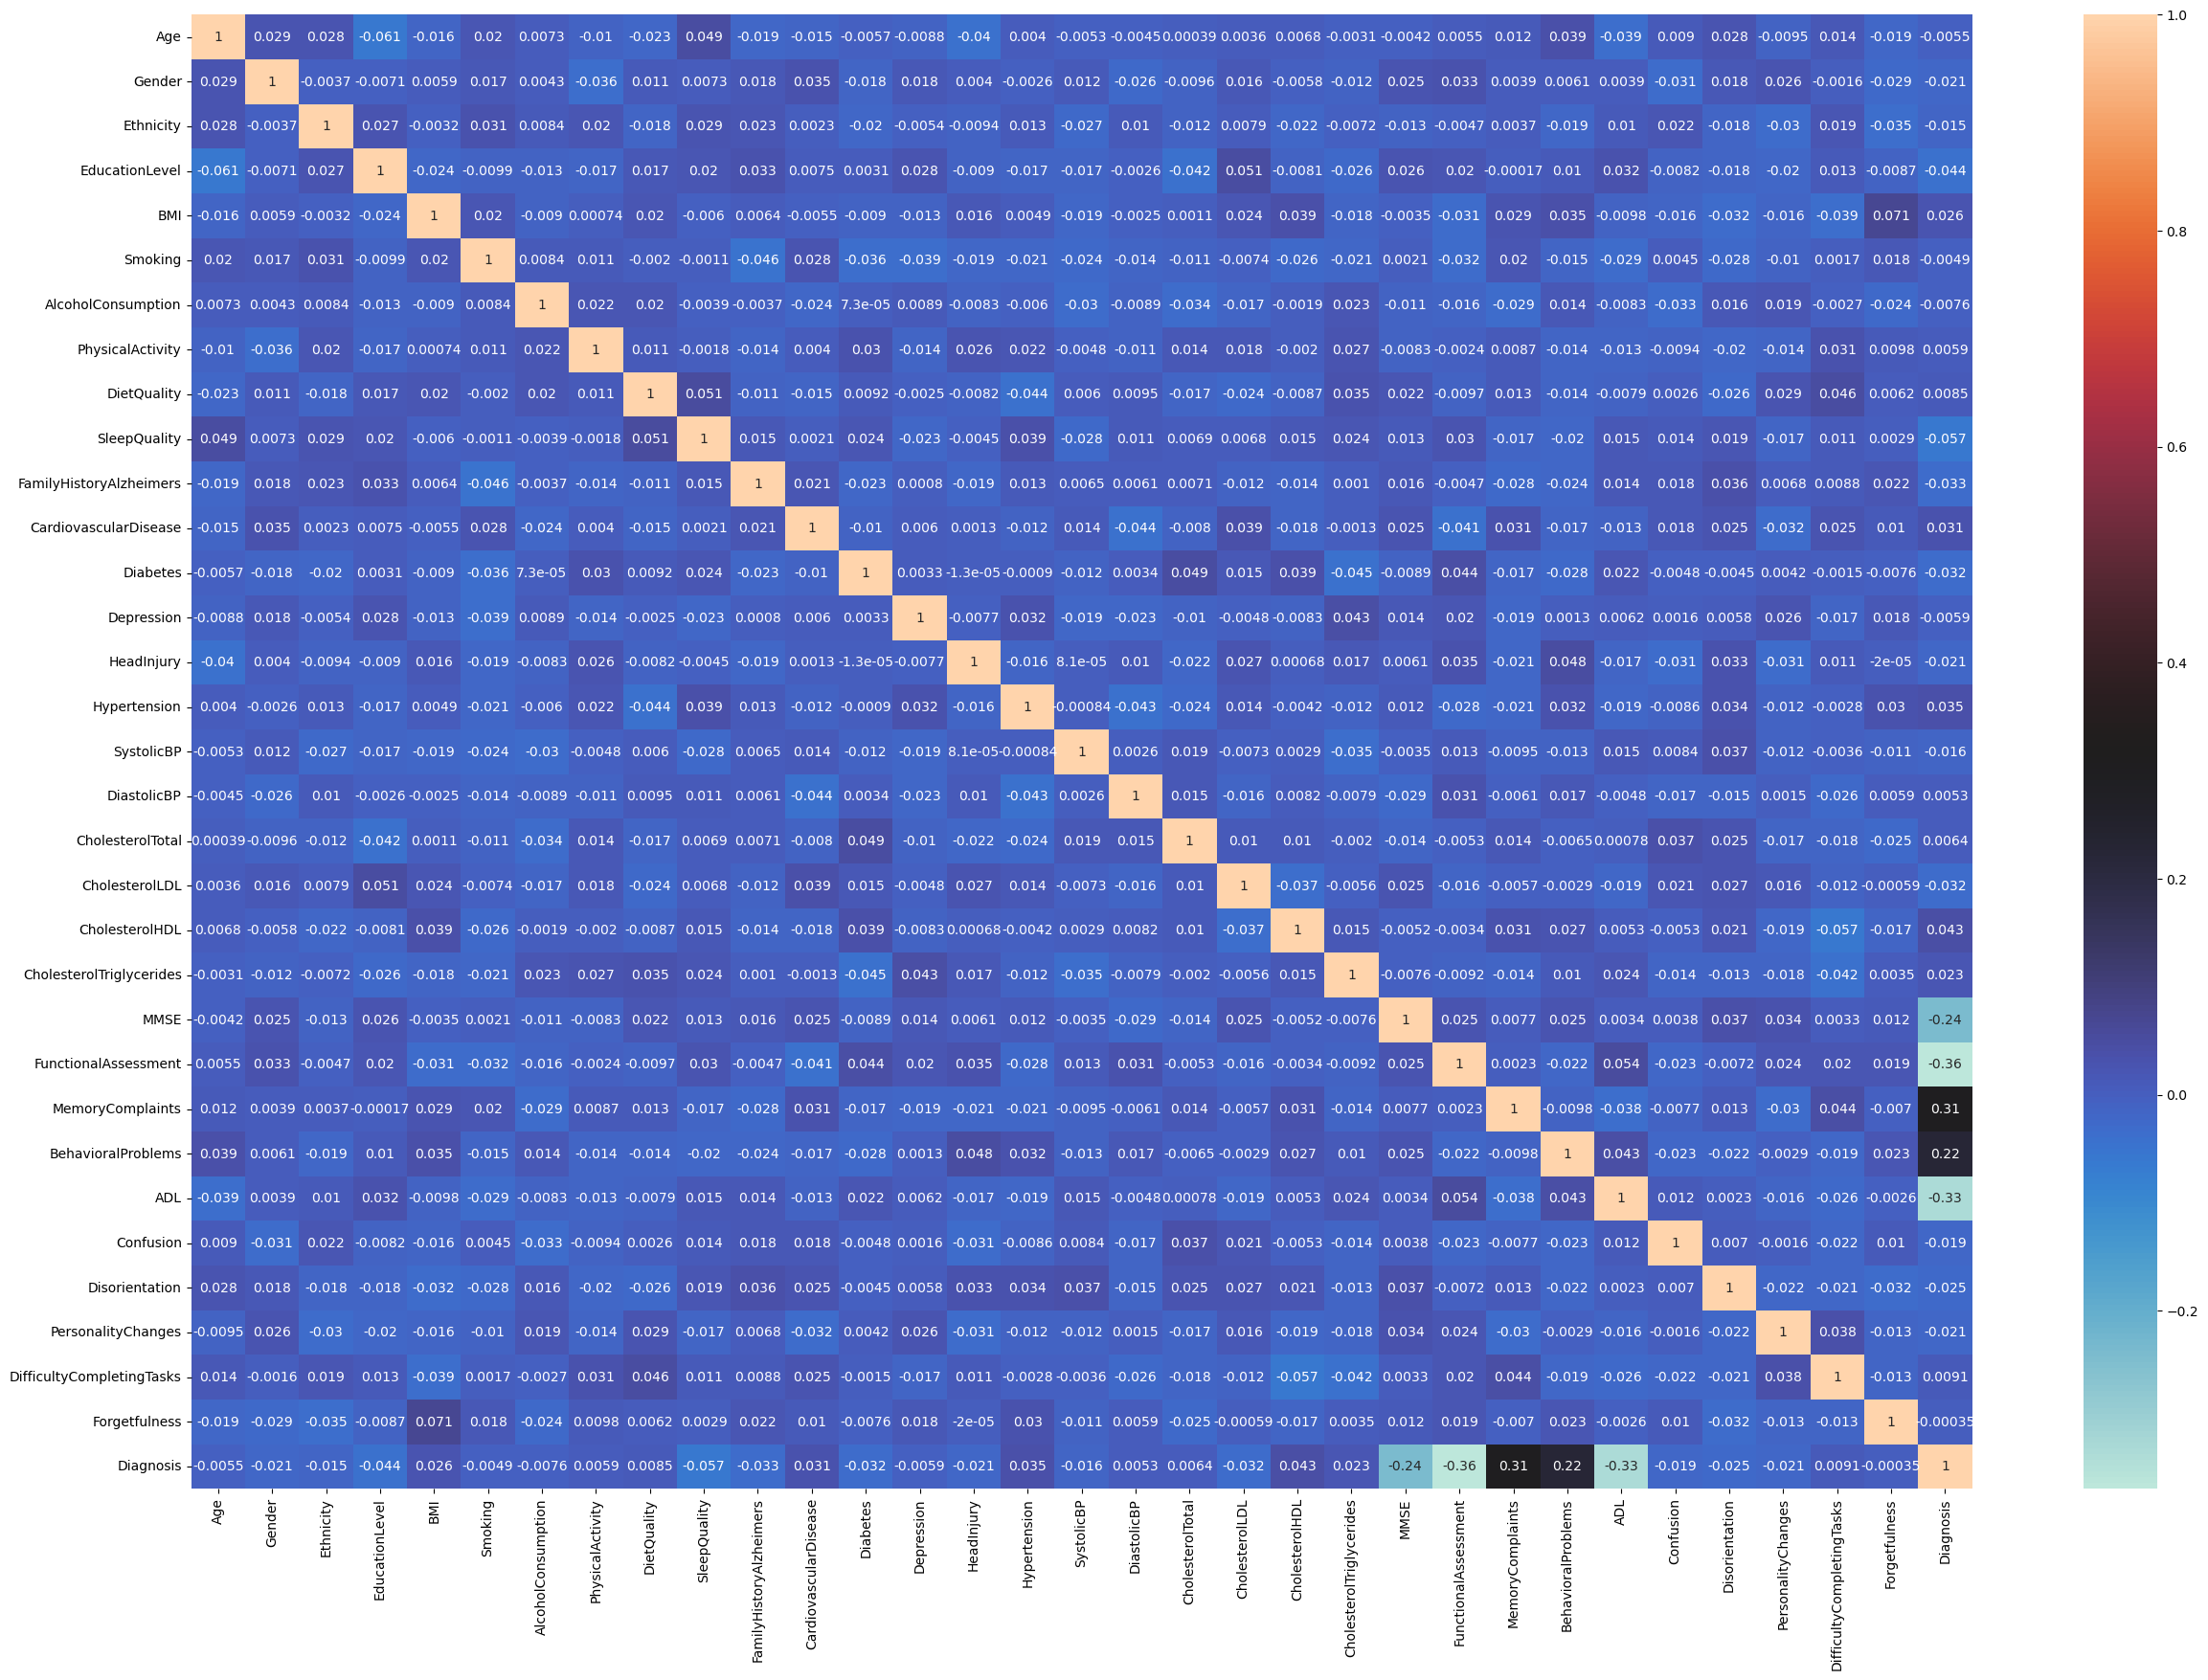

In [10]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='icefire')
plt.show()

## **2. Alzheimer Patients Distribution**

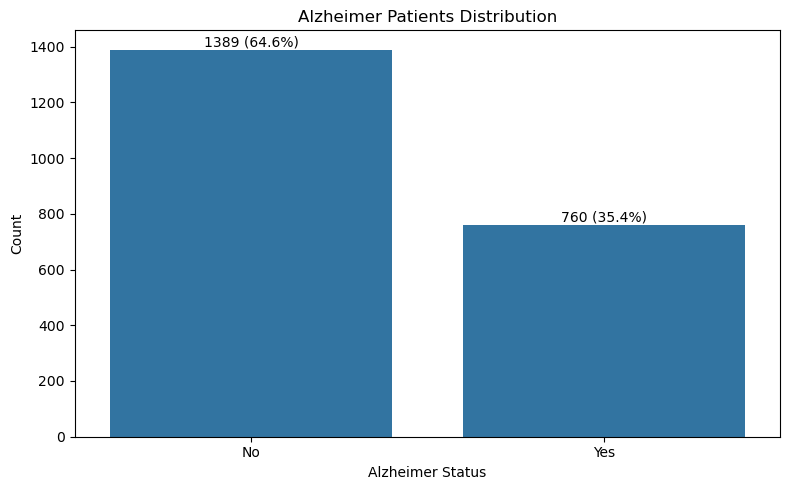

In [11]:
label_mapping_yn = {0: 'No', 1: 'Yes'}

plt.figure(figsize=(8, 5))
sns.countplot(df, x='Diagnosis')
plt.xlabel('Alzheimer Status')
plt.ylabel('Count')
plt.title('Alzheimer Patients Distribution')

for i, count in enumerate(df.Diagnosis.value_counts()):
    percent = (count/len(df))*100 
    plt.text(i, count + 0.1, f'{count} ({percent:.1f}%)', ha='center', va='bottom')

plt.gca().set_xticklabels(label_mapping_yn.values())
plt.tight_layout()
plt.show()

>*Of the 2149 patients who have been examined by Doctor XXXConfid, there are about 35.4% of patients who have alzheimer's disease*

## **3. Memory Complaints to Patient Status**

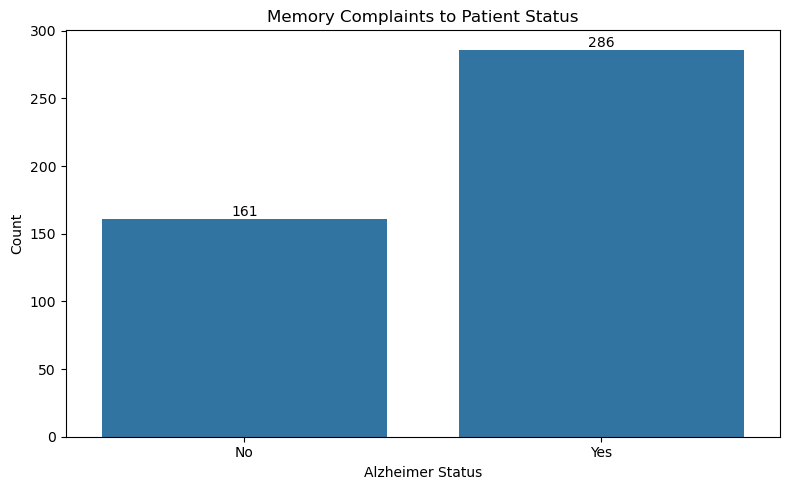

In [12]:
memoryprob = df[df['MemoryComplaints'] == 1]
memprof = memoryprob['Diagnosis'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.countplot(memoryprob, x='Diagnosis')
plt.xlabel('Alzheimer Status')
plt.ylabel('Count')
plt.title('Memory Complaints to Patient Status')

for i, count in enumerate(memprof):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')
    
plt.gca().set_xticklabels(label_mapping_yn.values())
plt.tight_layout()
plt.show()

>*It can be seen that most alzheimer's patients who have been examined by Doctor XXXConfid also have memory complaints, so this can explain why in the heatmap visualization, the correlation with alzheimer's diagnoses is the highest among other columns.*

## **4. Behavioral Problems to Patient Status**

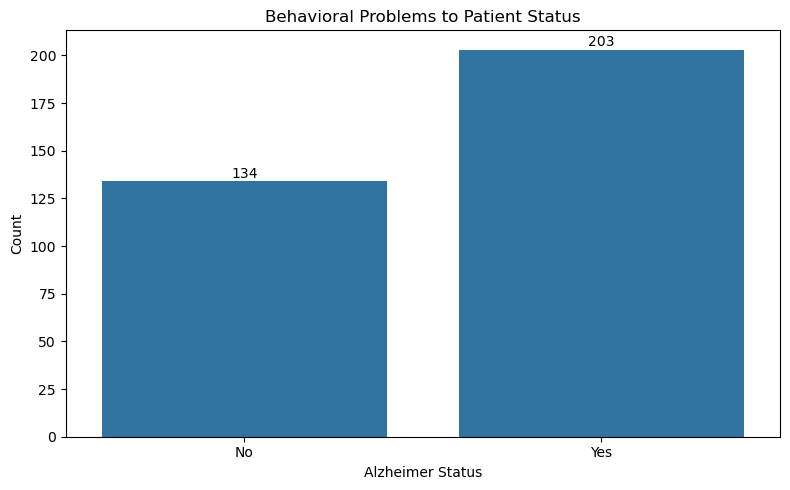

In [13]:
behavprob = df[df['BehavioralProblems'] == 1]
behavprof = behavprob['Diagnosis'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.countplot(behavprob, x='Diagnosis')
plt.xlabel('Alzheimer Status')
plt.ylabel('Count')
plt.title('Behavioral Problems to Patient Status')

for i, count in enumerate(behavprof):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')

plt.gca().set_xticklabels(label_mapping_yn.values())
plt.tight_layout()
plt.show()

>*It can be seen that most of the alzheimer's patients who have been examined by Doctor XXXConfid also have behavioral problems, so this may explain and conclude why in the heatmap visualization, the correlation with alzheimer's diagnosis ranks as the 2nd highest correlation among the other columns.*

## **5. Family History of Alzheimers in Patient Status**

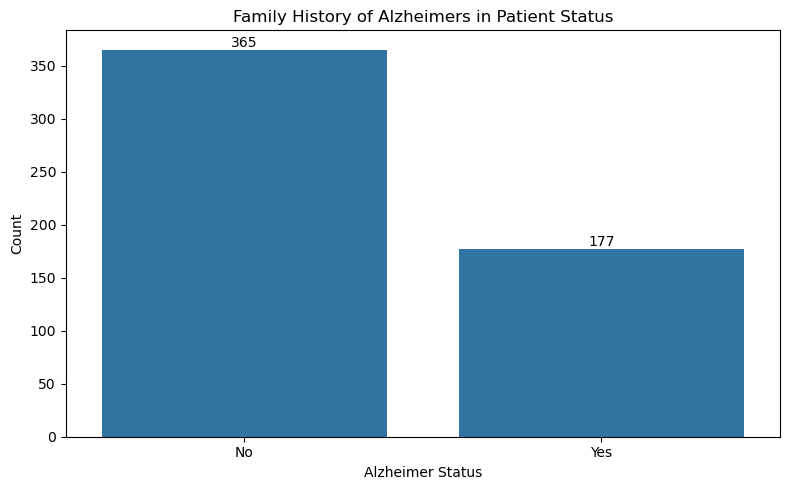

In [14]:
historyfam = df[df['FamilyHistoryAlzheimers'] == 1]
historyfamprof = historyfam['Diagnosis'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(historyfam , x='Diagnosis')
plt.xlabel('Alzheimer Status')
plt.ylabel('Count')
plt.title('Family History of Alzheimers in Patient Status')

for i, count in enumerate(historyfamprof):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')

plt.gca().set_xticklabels(label_mapping_yn.values())
plt.tight_layout()
plt.show()

>*It can be seen that there are relatives of patients who have alzheimer's other than alzheimer's patients who have been examined by Doctor XXXConfid, is not a determining factor why they have alzheimer's disease. this is evidenced by the number of patients who do not have alzheimer's is more than the number of patients who have alzheimer's.*

# **C. Feature Engineering**

## **1. BMI Status**

In [15]:
for i, row in df.iterrows():
    if row['BMI'] < 18.5:
        df.loc[i, "BMIStatus"] = 0
    elif 18.5 <= row['BMI'] < 25:
        df.loc[i, "BMIStatus"] = 1
    elif 25 <= row['BMI'] < 30:
        df.loc[i, "BMIStatus"] = 2
    elif row['BMI'] >= 30:
        df.loc[i, "BMIStatus"] = 3
df['BMIStatus'] = df['BMIStatus'].astype('int64')

- ## **BMI Status Distribution on Alzheimer Patients**

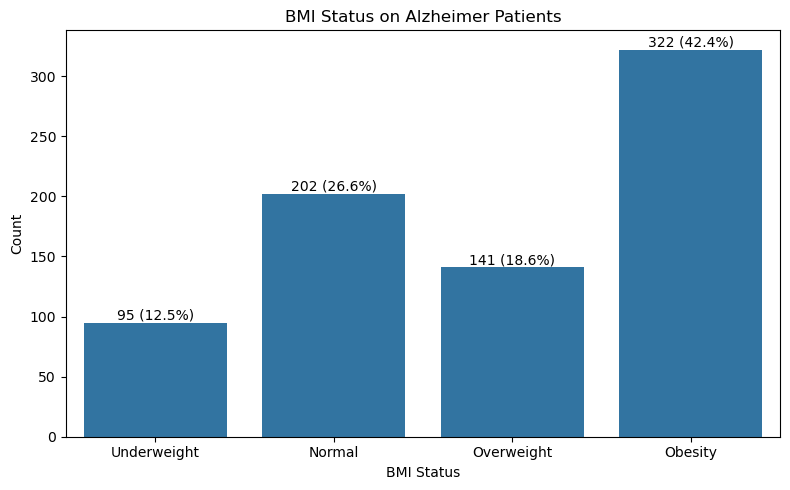

In [16]:
Dia1 = df[df['Diagnosis'] == 1]
bmistatprof = Dia1['BMIStatus'].value_counts().sort_index()
label_mapping_04 = {0: 'Underweight', 1: 'Normal', 2: 'Overweight', 3: 'Obesity'}

plt.figure(figsize=(8, 5))
sns.countplot(Dia1, x='BMIStatus')
plt.xlabel('BMI Status')
plt.ylabel('Count')
plt.title('BMI Status on Alzheimer Patients')

for i, count in enumerate(bmistatprof):
    percent_bmi = (count/len(Dia1))*100 
    plt.text(i, count + 0.1, f'{count} ({percent_bmi:.1f}%)', ha='center', va='bottom')

plt.gca().set_xticklabels(label_mapping_04.values())
plt.tight_layout()
plt.show()

**SMOTE - Oversampling Data**

Handling Imbalanced Data

In [17]:
# non_head = df
# head = df.pop('HeadInjury')

# smote = SMOTE(sampling_strategy = 1)
# X_resampled, y_resampled = smote.fit_resample(non_head, head) # Hint: the separate features and target variable

# # Combine resampled data into a DataFrame
# df = pd.concat([X_resampled, y_resampled], axis=1) # Hint: the resampled features and the resampled target variable

# # Print balanced dataset
# df

In [18]:
# # Get counts and calculate percentages
# n_target = df['HeadInjury'].value_counts().sort_values(ascending=False)
# pct_target = (n_target / len(df)) * 100

# # Configure the plot
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Primary y-axis (count)
# ax1.bar(n_target.index, n_target.values, label='Count')
# # ax1.set_xlabel('Target Value')
# ax1.set_ylabel('Count', color='b')

# # Secondary y-axis (percentage)
# ax2 = ax1.twinx()
# ax2.bar(pct_target.index, pct_target.values, label='Percentage')
# ax2.set_ylabel('Percentage', color='r')

# # Customize the plot
# plt.title('Distribution of Target Variable')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()

In [19]:
# scale_cols = (df.columns[df.dtypes=='float64']).tolist()+['Age','SystolicBP','DiastolicBP']
# df[scale_cols]

## **2. Split Dataset to Train and Test**

In [20]:
total_length = int(df.shape[0])
train_length = int(total_length * 0.8)

train, test = df[:train_length], df[train_length:]

# Reset indices (avoid unnecessary steps)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [21]:
X_train = train.drop('Diagnosis', axis=1) 
y_train = train['Diagnosis']

X_test = test.drop('Diagnosis', axis=1) 
y_test = test['Diagnosis']

## **3. Rescaling Data**

In [22]:
# from sklearn.preprocessing import MinMaxScaler

# cols2scale=(df.columns[df.dtypes=='float64']).tolist()+['Age','SystolicBP','DiastolicBP']
# numeric_cols = cols2scale.copy()

numeric_cols = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.fit_transform(X_test[numeric_cols])

train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_cols), X_train.drop(numeric_cols, axis=1)], axis=1)
test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_cols), X_test.drop(numeric_cols, axis=1)], axis=1)

train_scaled = pd.concat([train_scaled, y_train], axis=1)
test_scaled = pd.concat([test_scaled, y_test], axis=1)

In [23]:
X_train_scaled = train_scaled.drop("Diagnosis", axis=1)
y_train_scaled = train_scaled["Diagnosis"]

X_test_scaled = test_scaled.drop("Diagnosis", axis=1)
y_test_scaled = test_scaled["Diagnosis"]

# **D. Classification Modeling**

In [24]:
from scipy.stats import randint, uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold, RandomizedSearchCV, LearningCurveDisplay, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
def plot_learning_curve(estimator, title, X, y, cv=None, scoring=None):
  
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)

  plt.figure()
  LearningCurveDisplay(train_sizes=train_sizes,train_scores=train_scores, test_scores=test_scores, score_name=scoring).plot()
  plt.title(f"{title} Learning Curve")
  plt.show()

## **1. XGBClassifier**

### **a. Before Hyperparameter Tune**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [26]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train_scaled, y_train_scaled) 

y_pred_train_xgb = model_xgb.predict(X_train_scaled) 
y_pred_test_xgb = model_xgb.predict(X_test_scaled) 

print("Cross Validation Score: ", cross_val_score(model_xgb, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9895297986304156


#### **2) ROC Curve**

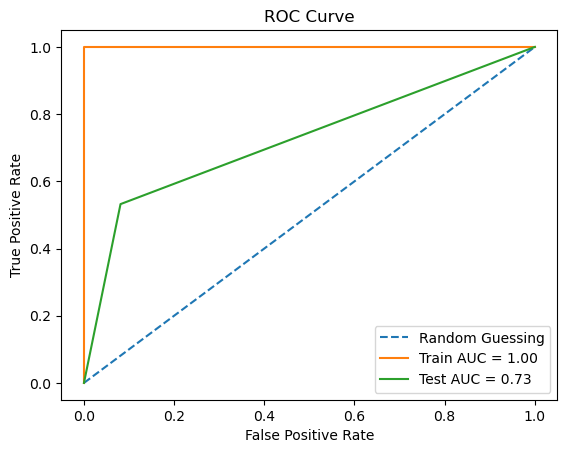

In [27]:
# Calculate AUC scores
train_auc_xgb = roc_auc_score(y_train_scaled, y_pred_train_xgb) 
test_auc_xgb = roc_auc_score(y_test_scaled, y_pred_test_xgb)

# Calculate ROC curve for train and test sets
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train_scaled, y_pred_train_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test_scaled, y_pred_test_xgb)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'Train AUC = {train_auc_xgb:.2f}')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'Test AUC = {test_auc_xgb:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

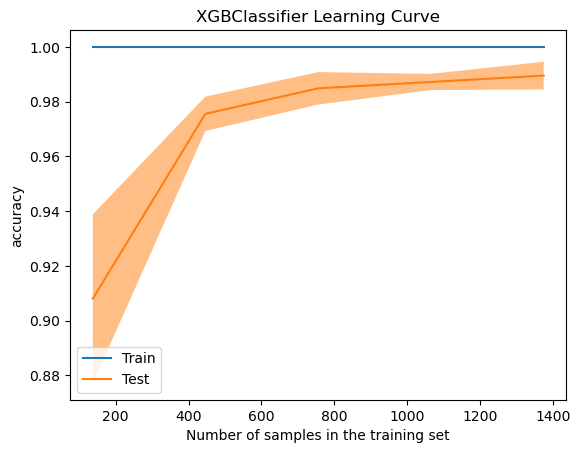

In [28]:
plot_learning_curve(model_xgb, "XGBClassifier", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       259
           1       0.81      0.53      0.64       171

    accuracy                           0.77       430
   macro avg       0.78      0.73      0.73       430
weighted avg       0.77      0.77      0.75       430



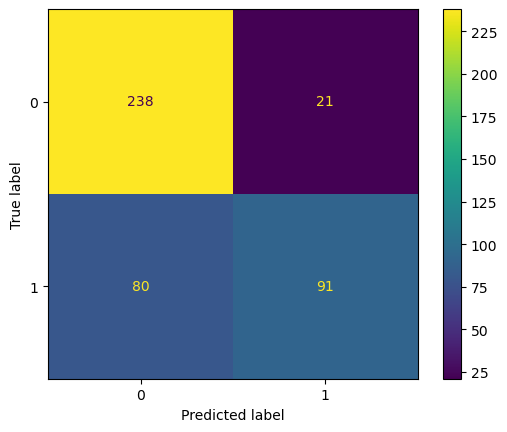

In [29]:
print(classification_report(y_test_scaled, y_pred_test_xgb))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_xgb)).plot()
plt.show()

#### **Additional: XGBoost Feature Importance**

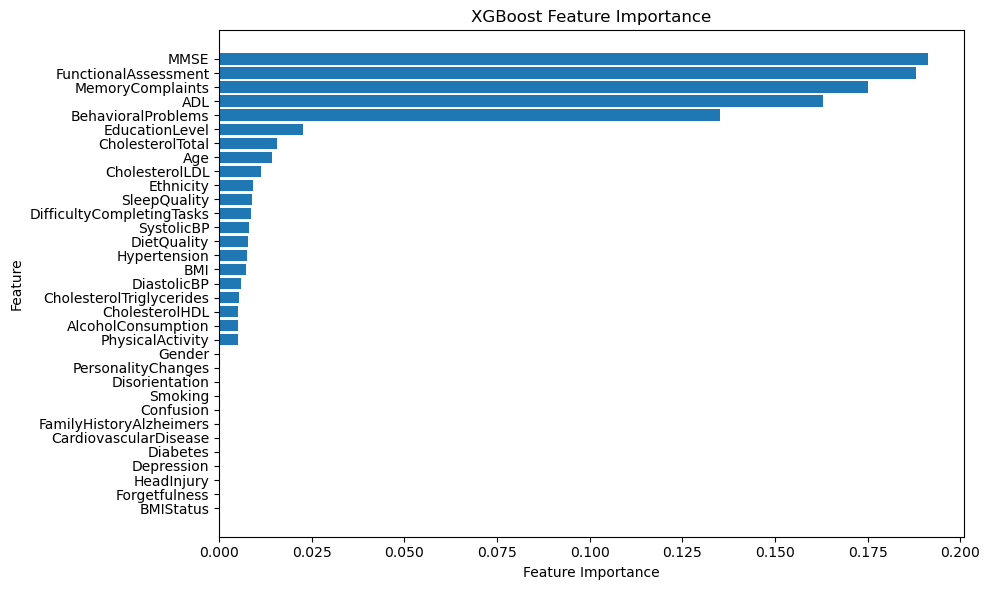

In [30]:
# Feature importance visualization
feature_importance = model_xgb.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()[::-1]
features_sorted = feature_names[sorted_idx]
importance_values = feature_importance[sorted_idx]

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Arrange features with highest importance at the top
plt.tight_layout()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [31]:
# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.1, 0.9),
    'n_estimators': randint(50, 300),
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=250, cv=cv)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_scaled, y_train_scaled)

# Print the best set of hyperparameters and the corresponding score
print("Best Estimator: ", random_search.best_estimator_)

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.27140766311295383,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=122, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [32]:
# clf_hp = XGBClassifier(objective='binary:logistic', max_depth=14, learning_rate=0.3024667513435617, n_estimators=154, subsample=0.5515011536989256)
clf_hp = random_search.best_estimator_

clf_hp.fit(X_train_scaled, y_train_scaled)

y_pred_train_xgb_a = clf_hp.predict(X_train_scaled)
y_pred_test_xgb_a = clf_hp.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(clf_hp, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9906925893280899


#### **3) ROC Curve**

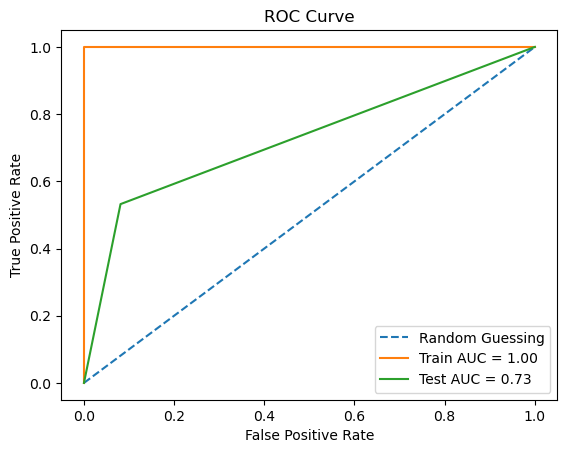

In [33]:
# Calculate ROC curve for train and test sets
train_auc_a_xgb = roc_auc_score(y_train_scaled, y_pred_train_xgb_a) 
test_auc_a_xgb = roc_auc_score(y_test_scaled, y_pred_test_xgb_a)

fpr_train_xgb_a, tpr_train_xgb_a, _ = roc_curve(y_train_scaled, y_pred_train_xgb_a)
fpr_test_xgb_a, tpr_test_xgb_a, _ = roc_curve(y_test_scaled, y_pred_test_xgb_a)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_xgb_a, tpr_train_xgb_a, label=f'Train AUC = {train_auc_a_xgb:.2f}')
plt.plot(fpr_test_xgb_a, tpr_test_xgb_a, label=f'Test AUC = {test_auc_a_xgb:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

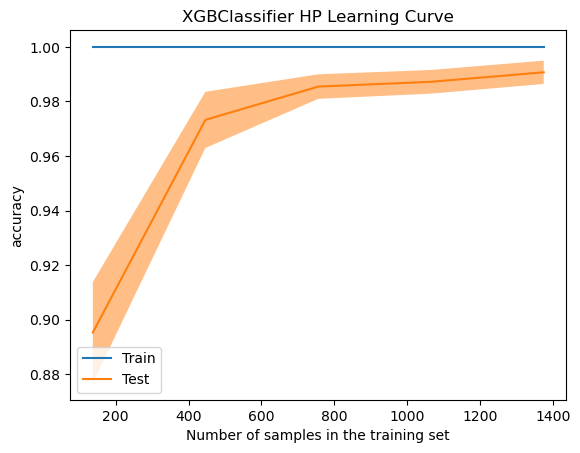

In [34]:
plot_learning_curve(clf_hp, "XGBClassifier HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       259
           1       0.81      0.53      0.64       171

    accuracy                           0.77       430
   macro avg       0.78      0.73      0.73       430
weighted avg       0.77      0.77      0.75       430



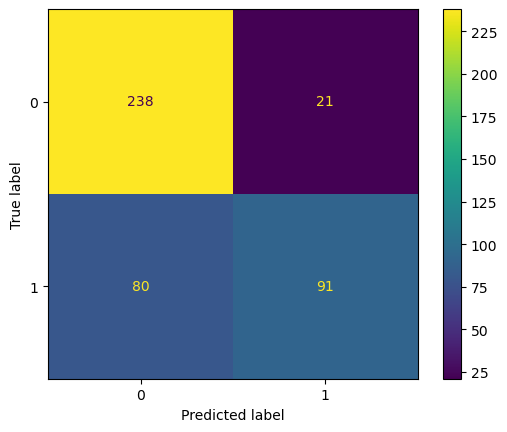

In [35]:
print(classification_report(y_test_scaled, y_pred_test_xgb_a))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_xgb_a)).plot()
plt.show()

## **2. Random Forest Classifier**

### **a. Before Hyperparameter Tuning**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [36]:
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train_scaled, y_train_scaled)

y_pred_train_rfc = clf_rfc.predict(X_train_scaled)
y_pred_test_rfc = clf_rfc.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(clf_rfc, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9709200623771104


#### **2) ROC Curve**

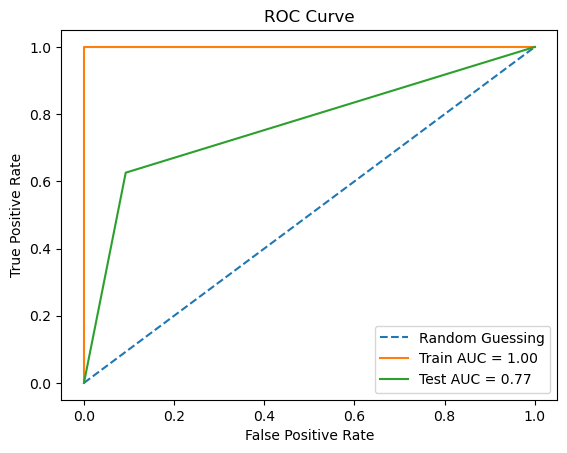

In [37]:
train_auc_rfc = roc_auc_score(y_train_scaled, y_pred_train_rfc)
test_auc_rfc = roc_auc_score(y_test_scaled, y_pred_test_rfc)

# Calculate ROC curve for train and test sets
fpr_train_rfc, tpr_train_rfc, _ = roc_curve(y_train_scaled, y_pred_train_rfc)
fpr_test_rfc, tpr_test_rfc, _ = roc_curve(y_test_scaled, y_pred_test_rfc)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_rfc, tpr_train_rfc, label=f'Train AUC = {train_auc_rfc:.2f}')
plt.plot(fpr_test_rfc, tpr_test_rfc, label=f'Test AUC = {test_auc_rfc:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

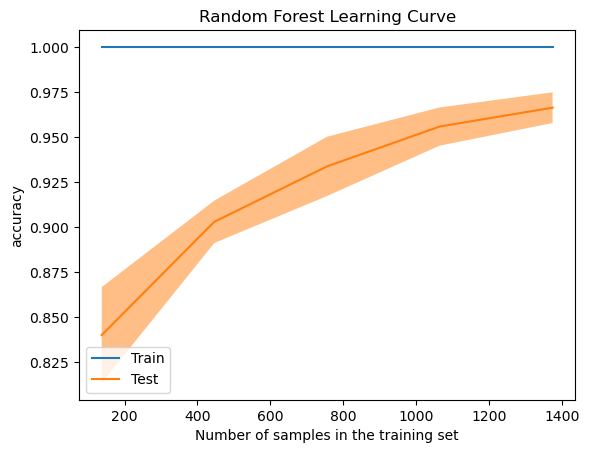

In [38]:
plot_learning_curve(clf_rfc, "Random Forest", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       259
           1       0.82      0.63      0.71       171

    accuracy                           0.80       430
   macro avg       0.80      0.77      0.78       430
weighted avg       0.80      0.80      0.79       430



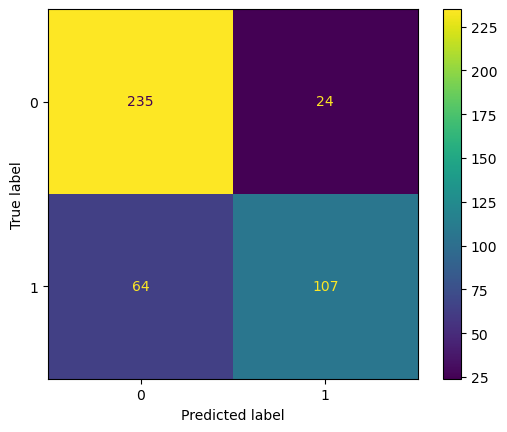

In [39]:
print(classification_report(y_test_scaled, y_pred_test_rfc))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_rfc)).plot()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [40]:
# setup parameter space
params = {'max_depth': randint(3, 50),
          'min_samples_leaf': randint(1, 40),
          'min_samples_split': randint(3, 50),
          'max_features' : randint(1, 40),
          'criterion':['gini','entropy']}

# create an instance of the randomized search object
r1 = RandomizedSearchCV(estimator=clf_rfc,param_distributions=params,cv=cv,n_iter=250,n_jobs=-1, verbose=True)

r1.fit(X_train_scaled, y_train_scaled)

# Print the best set of hyperparameters and the corresponding score=
print("Best Estimator: ", r1.best_estimator_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best Estimator:  RandomForestClassifier(criterion='entropy', max_depth=43, max_features=24,
                       min_samples_leaf=6, min_samples_split=7)


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [41]:
clf_rfc_hp = r1.best_estimator_
clf_rfc_hp.fit(X_train_scaled, y_train_scaled)

y_pred_train_rfc_hp = clf_rfc_hp.predict(X_train_scaled)
y_pred_test_rfc_hp = clf_rfc_hp.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(clf_rfc_hp, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9860414265373922


#### **3) ROC Curve**

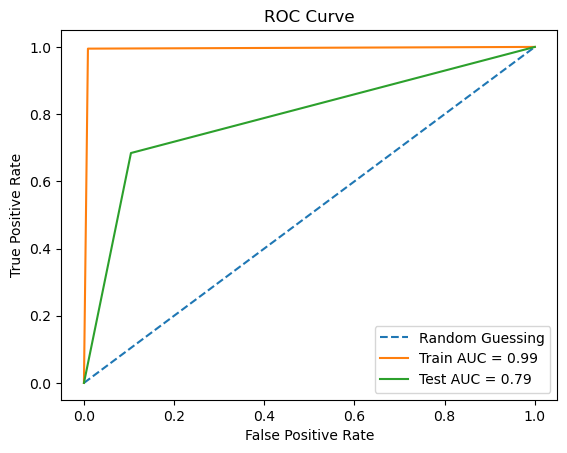

In [42]:
train_auc_rfc_hp = roc_auc_score(y_train_scaled, y_pred_train_rfc_hp) # Hint: the real target variable and the predicted target variable of the train set
test_auc_rfc_hp = roc_auc_score(y_test_scaled, y_pred_test_rfc_hp)

# Calculate ROC curve for train and test sets
fpr_train_rfc_hp, tpr_train_rfc_hp, _ = roc_curve(y_train_scaled, y_pred_train_rfc_hp)
fpr_test_rfc_hp, tpr_test_rfc_hp, _ = roc_curve(y_test_scaled, y_pred_test_rfc_hp)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_rfc_hp, tpr_train_rfc_hp, label=f'Train AUC = {train_auc_rfc_hp:.2f}')
plt.plot(fpr_test_rfc_hp, tpr_test_rfc_hp, label=f'Test AUC = {test_auc_rfc_hp:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

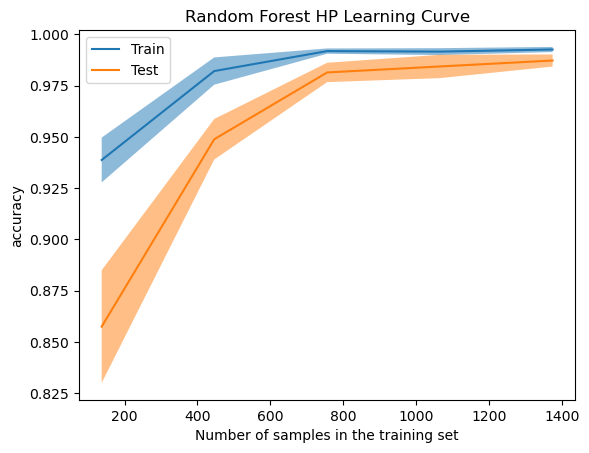

In [43]:
plot_learning_curve(clf_rfc_hp, "Random Forest HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       259
           1       0.81      0.68      0.74       171

    accuracy                           0.81       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.81      0.81      0.81       430



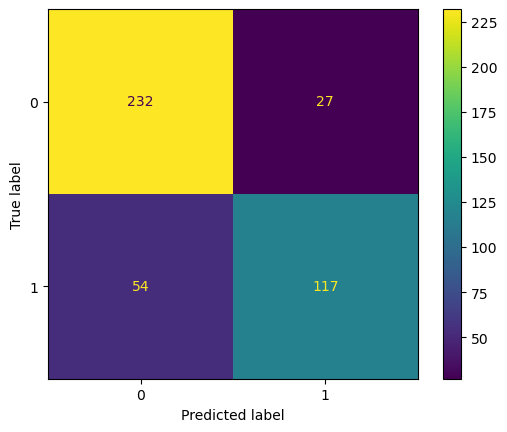

In [44]:
print(classification_report(y_test_scaled, y_pred_test_rfc_hp))

ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_rfc_hp)).plot()
plt.show()

## **3. Logistic Regression**

### **a. Before Hyperparameter Tuning**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [45]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled, y_train_scaled)

y_pred_train_lr = clf_lr.predict(X_train_scaled)
y_pred_test_lr = clf_lr.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(clf_lr, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.8609600650891587


#### **2) ROC Curve**

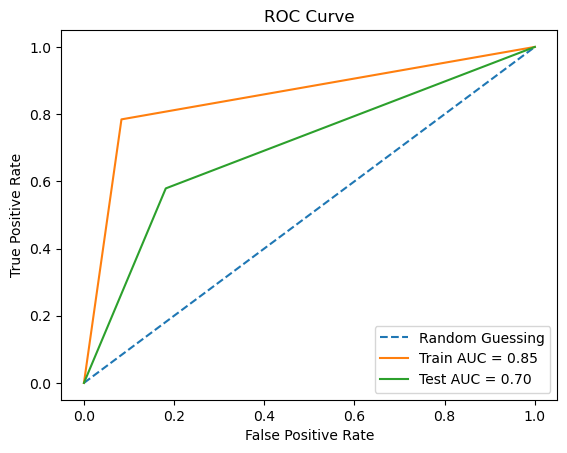

In [46]:
train_auc_lr = roc_auc_score(y_train_scaled, y_pred_train_lr) 
test_auc_lr = roc_auc_score(y_test_scaled, y_pred_test_lr)

# Calculate ROC curve for train and test sets
fpr_train_lr, tpr_train_lr, _ = roc_curve(y_train_scaled, y_pred_train_lr)
fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test_scaled, y_pred_test_lr)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_lr, tpr_train_lr, label=f'Train AUC = {train_auc_lr:.2f}')
plt.plot(fpr_test_lr, tpr_test_lr, label=f'Test AUC = {test_auc_lr:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

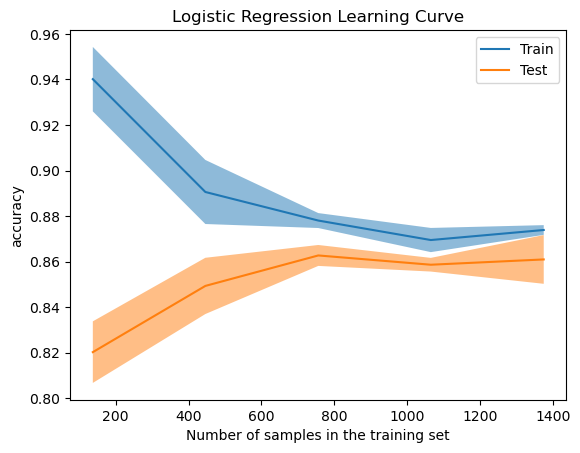

In [47]:
 
plot_learning_curve(clf_lr, "Logistic Regression", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       259
           1       0.68      0.58      0.62       171

    accuracy                           0.72       430
   macro avg       0.71      0.70      0.70       430
weighted avg       0.72      0.72      0.72       430



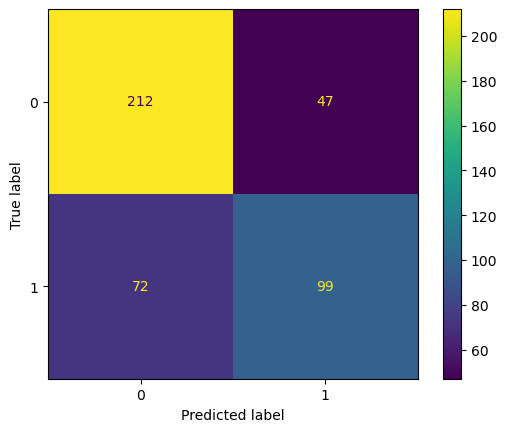

In [48]:
print(classification_report(y_test_scaled, y_pred_test_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_lr)).plot()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [49]:
# setup parameter space

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : randint(100, 2500)
    }
]

# create an instance of the randomized search object
lr_hp = RandomizedSearchCV(clf_lr, param_grid, cv = 10, n_iter=250, verbose=True, n_jobs=-1)

lr_hp.fit(X_train_scaled, y_train_scaled)

print("Best Estimator: ", lr_hp.best_estimator_)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Best Estimator:  LogisticRegression(C=0.012742749857031334, max_iter=1955, penalty='l1',
                   solver='liblinear')


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [50]:
clf_lr_hp = lr_hp.best_estimator_
clf_lr_hp.fit(X_train_scaled, y_train_scaled)

y_pred_train_lr_hp = clf_lr_hp.predict(X_train_scaled)
y_pred_test_lr_hp = clf_lr_hp.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(clf_lr_hp, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.8667757136077021


#### **3) ROC Curve**

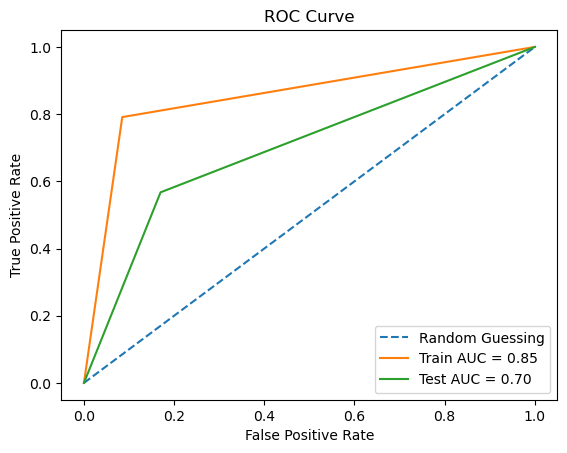

In [51]:
train_auc_lr_hp = roc_auc_score(y_train_scaled, y_pred_train_lr_hp)
test_auc_lr_hp = roc_auc_score(y_test_scaled, y_pred_test_lr_hp)

# Calculate ROC curve for train and test sets
fpr_train_lr_hp, tpr_train_lr_hp, _ = roc_curve(y_train_scaled, y_pred_train_lr_hp)
fpr_test_lr_hp, tpr_test_lr_hp, _ = roc_curve(y_test_scaled, y_pred_test_lr_hp)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_lr_hp, tpr_train_lr_hp, label=f'Train AUC = {train_auc_lr_hp:.2f}')
plt.plot(fpr_test_lr_hp, tpr_test_lr_hp, label=f'Test AUC = {test_auc_lr_hp:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

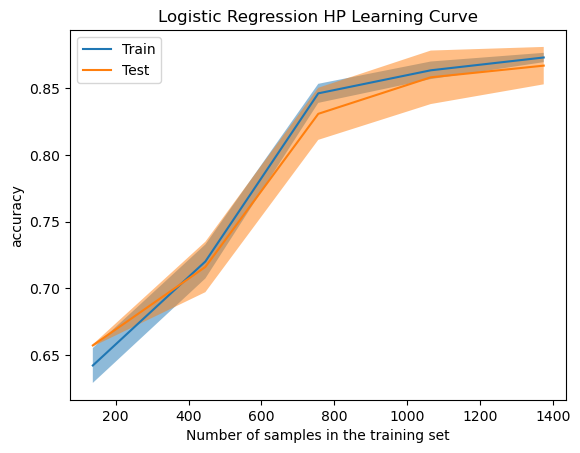

In [52]:
 
plot_learning_curve(clf_lr_hp, "Logistic Regression HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       259
           1       0.69      0.57      0.62       171

    accuracy                           0.73       430
   macro avg       0.72      0.70      0.70       430
weighted avg       0.72      0.73      0.72       430



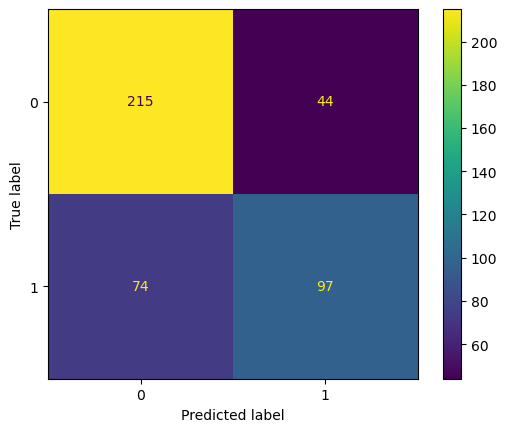

In [53]:
print(classification_report(y_test_scaled, y_pred_test_lr_hp))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_lr_hp)).plot()
plt.show()

## **4. Gaussian Naive Bayes**

### **a. Before Hyperparameter Tuning**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [54]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train_scaled)

predict_train_nb = model_nb.predict(X_train_scaled)
predict_test_nb = model_nb.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(model_nb, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.8347871042104551


#### **2) ROC Curve**

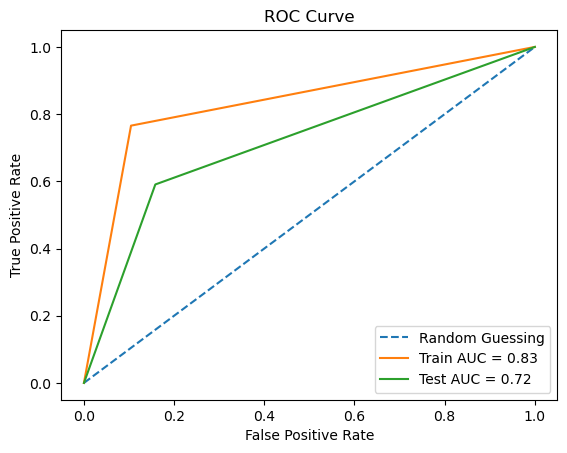

In [55]:
train_auc_nb = roc_auc_score(y_train_scaled, predict_train_nb)
test_auc_nb = roc_auc_score(y_test_scaled, predict_test_nb)

# Calculate ROC curve for train and test sets
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train_scaled, predict_train_nb)
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test_scaled, predict_test_nb)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_nb, tpr_train_nb, label=f'Train AUC = {train_auc_nb:.2f}')
plt.plot(fpr_test_nb, tpr_test_nb, label=f'Test AUC = {test_auc_nb:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

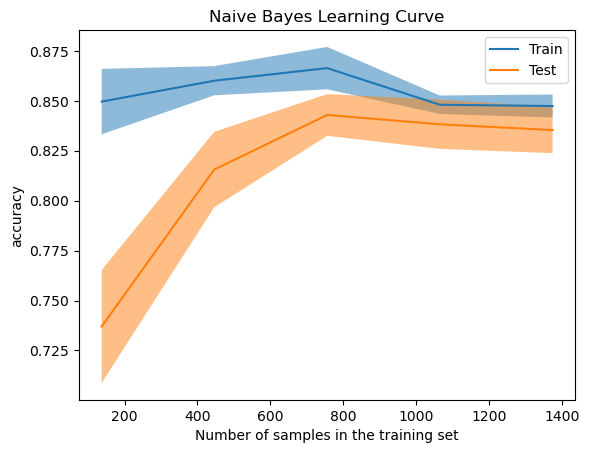

In [56]:
plot_learning_curve(model_nb, "Naive Bayes", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       259
           1       0.71      0.59      0.65       171

    accuracy                           0.74       430
   macro avg       0.73      0.72      0.72       430
weighted avg       0.74      0.74      0.74       430



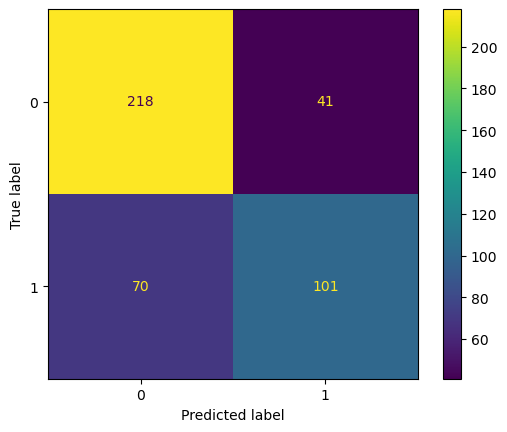

In [57]:
print(classification_report(y_test_scaled, predict_test_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, predict_test_nb)).plot()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [58]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Calculation Stability to Widen (or Smooth) the Curve
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=cv, n_jobs=-1)

nbModel_grid.fit(X_train_scaled, y_train_scaled)

print("Best score: ", nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best score:  GaussianNB(var_smoothing=0.12328467394420659)


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [59]:
nbModel = nbModel_grid.best_estimator_
nbModel.fit(X_train_scaled, y_train_scaled)

predict_train_nb_a = nbModel.predict(X_train_scaled)
predict_test_nb_a = nbModel.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(nbModel, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.8406010576988271


#### **3) ROC Curve**

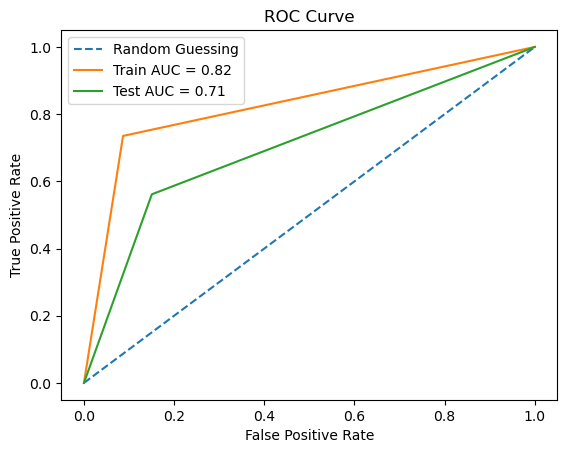

In [60]:
train_auc_nb_a = roc_auc_score(y_train_scaled, predict_train_nb_a) # Hint: the real target variable and the predicted target variable of the train set
test_auc_nb_a = roc_auc_score(y_test_scaled, predict_test_nb_a)

# Calculate ROC curve for train and test sets
fpr_train_nb_a, tpr_train_nb_a, _ = roc_curve(y_train_scaled, predict_train_nb_a)
fpr_test_nb_a, tpr_test_nb_a, _ = roc_curve(y_test_scaled, predict_test_nb_a)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_nb_a, tpr_train_nb_a, label=f'Train AUC = {train_auc_nb_a:.2f}')
plt.plot(fpr_test_nb_a, tpr_test_nb_a, label=f'Test AUC = {test_auc_nb_a:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

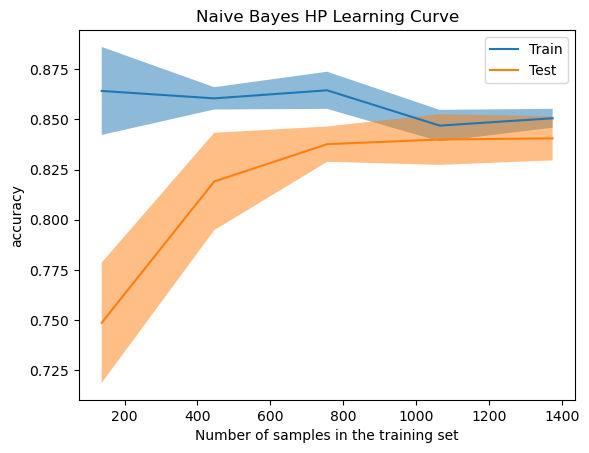

In [61]:
plot_learning_curve(nbModel, "Naive Bayes HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       259
           1       0.71      0.56      0.63       171

    accuracy                           0.73       430
   macro avg       0.73      0.71      0.71       430
weighted avg       0.73      0.73      0.73       430



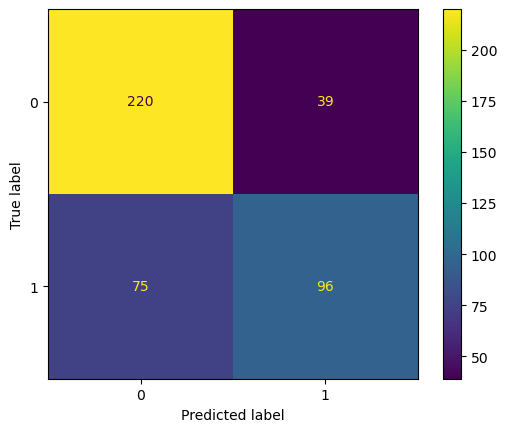

In [62]:
print(classification_report(y_test_scaled, predict_test_nb_a))

ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, predict_test_nb_a)).plot()
plt.show()

## **5. SVM Classifier**

### **a. Before Hyperparameter Tuning**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [63]:
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train_scaled)

y_pred_train_svc = model_svc.predict(X_train_scaled)
y_pred_test_svc = model_svc.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(model_svc, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.8696877754424028


#### **2) ROC Curve**

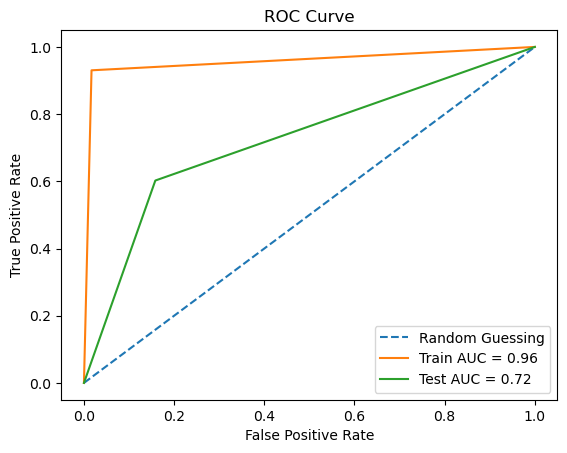

In [64]:
train_auc_svc = roc_auc_score(y_train_scaled, y_pred_train_svc) 
test_auc_svc = roc_auc_score(y_test_scaled, y_pred_test_svc)

# Calculate ROC curve for train and test sets
fpr_train_svc, tpr_train_svc, _ = roc_curve(y_train_scaled, y_pred_train_svc)
fpr_test_svc, tpr_test_svc, _ = roc_curve(y_test_scaled, y_pred_test_svc)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_svc, tpr_train_svc, label=f'Train AUC = {train_auc_svc:.2f}')
plt.plot(fpr_test_svc, tpr_test_svc, label=f'Test AUC = {test_auc_svc:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

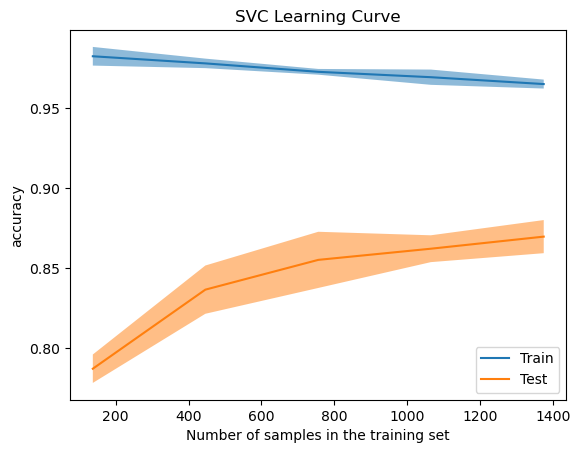

In [65]:
plot_learning_curve(model_svc, "SVC", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       259
           1       0.72      0.60      0.65       171

    accuracy                           0.75       430
   macro avg       0.74      0.72      0.73       430
weighted avg       0.74      0.75      0.74       430



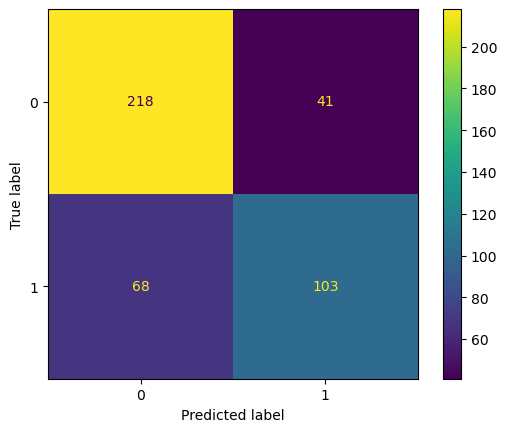

In [66]:
print(classification_report(y_test_scaled, y_pred_test_svc))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_svc)).plot()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [67]:
svc_param_grid = {'C': np.logspace(-10, 10, 21),
                  'gamma': np.logspace(-10, 10, 21).tolist()+['scale', 'auto'],}

svc_grid = RandomizedSearchCV(model_svc, svc_param_grid, verbose=0, cv=cv, n_jobs=-1, refit='accuracy', n_iter=250, scoring='accuracy')

svc_grid.fit(X_train_scaled, y_train_scaled)

print("Best score: ", svc_grid.best_estimator_)

Best score:  SVC()


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [68]:
modelSVC = svc_grid.best_estimator_
modelSVC.fit(X_train_scaled, y_train_scaled)

y_pred_train_svc_a = modelSVC.predict(X_train_scaled)
y_pred_test_svc_a = modelSVC.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(modelSVC, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.8696877754424028


#### **3) ROC Curve**

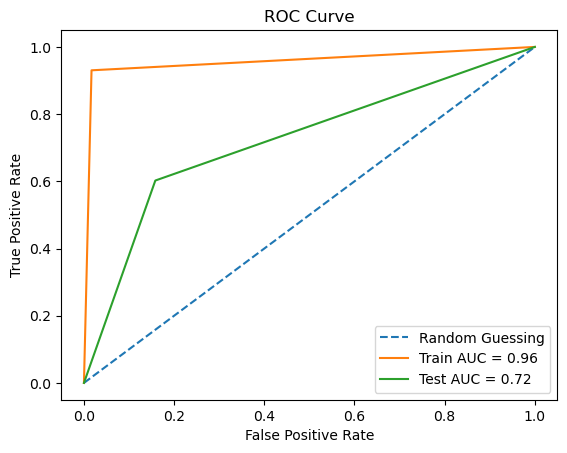

In [69]:
train_auc_svc_a = roc_auc_score(y_train_scaled, y_pred_train_svc_a) 
test_auc_svc_a = roc_auc_score(y_test_scaled, y_pred_test_svc_a)

# Calculate ROC curve for train and test sets
fpr_train_svc_a, tpr_train_svc_a, _ = roc_curve(y_train_scaled, y_pred_train_svc_a)
fpr_test_svc_a, tpr_test_svc_a, _ = roc_curve(y_test_scaled, y_pred_test_svc_a)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_svc_a, tpr_train_svc_a, label=f'Train AUC = {train_auc_svc_a:.2f}')
plt.plot(fpr_test_svc_a, tpr_test_svc_a, label=f'Test AUC = {test_auc_svc_a:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

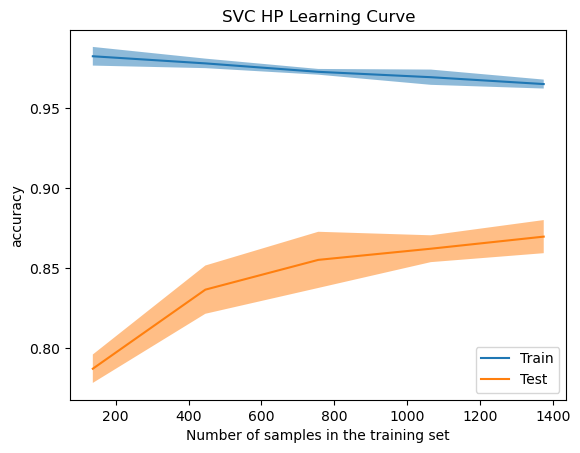

In [70]:
plot_learning_curve(modelSVC, "SVC HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       259
           1       0.72      0.60      0.65       171

    accuracy                           0.75       430
   macro avg       0.74      0.72      0.73       430
weighted avg       0.74      0.75      0.74       430



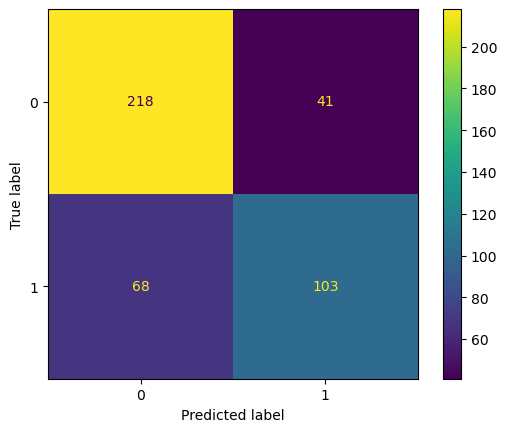

In [71]:
print(classification_report(y_test_scaled, y_pred_test_svc_a))

ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_svc_a)).plot()
plt.show()

## **6. k-Nearest Neighborhood**

### **a. Before Hyperparameter Tuning**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [72]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train_scaled)

y_pred_train_knn = model_knn.predict(X_train_scaled)
y_pred_test_knn = model_knn.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(model_knn, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.758578547698149


#### **2) ROC Curve**

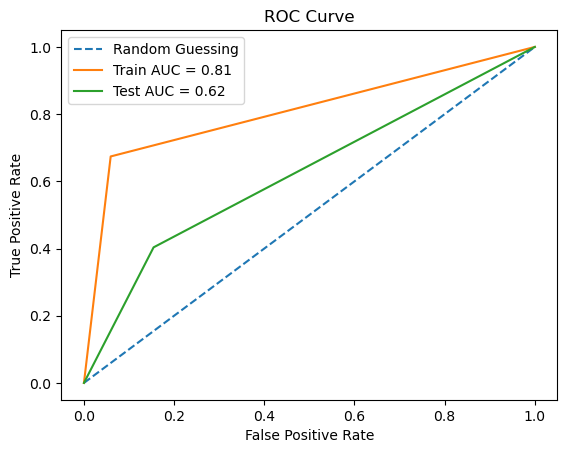

In [73]:
train_auc_knn = roc_auc_score(y_train_scaled, y_pred_train_knn) 
test_auc_knn = roc_auc_score(y_test_scaled, y_pred_test_knn)

# Calculate ROC curve for train and test sets
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train_scaled, y_pred_train_knn)
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test_scaled, y_pred_test_knn)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_knn, tpr_train_knn, label=f'Train AUC = {train_auc_knn:.2f}')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'Test AUC = {test_auc_knn:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

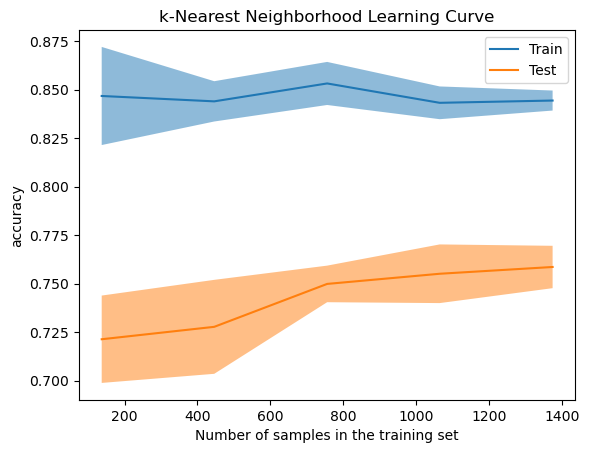

In [74]:
 
plot_learning_curve(model_knn, "k-Nearest Neighborhood", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       259
           1       0.63      0.40      0.49       171

    accuracy                           0.67       430
   macro avg       0.66      0.62      0.62       430
weighted avg       0.66      0.67      0.65       430



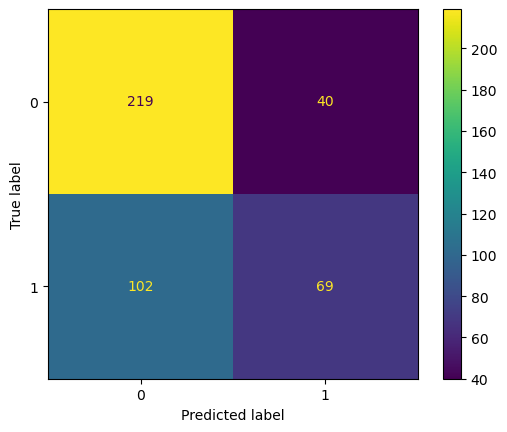

In [75]:
print(classification_report(y_test_scaled, y_pred_test_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_knn)).plot()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [76]:
knn_param_grid = {'n_neighbors' : np.arange(2, 20, 1),
                  'weights' : ['uniform','distance'],
                  'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = RandomizedSearchCV(model_knn, knn_param_grid, verbose=1, cv=cv, n_jobs=-1, n_iter=250)

knn_grid.fit(X_train_scaled, y_train_scaled)

print("Best Estimator: ", knn_grid.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Estimator:  KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [77]:
modelKNN = knn_grid.best_estimator_
modelKNN.fit(X_train_scaled, y_train_scaled)

y_predict_train_KNN = modelKNN.predict(X_train_scaled)
y_predict_test_KNN = modelKNN.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(modelKNN, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.7818547020136959


#### **3) ROC Curve**

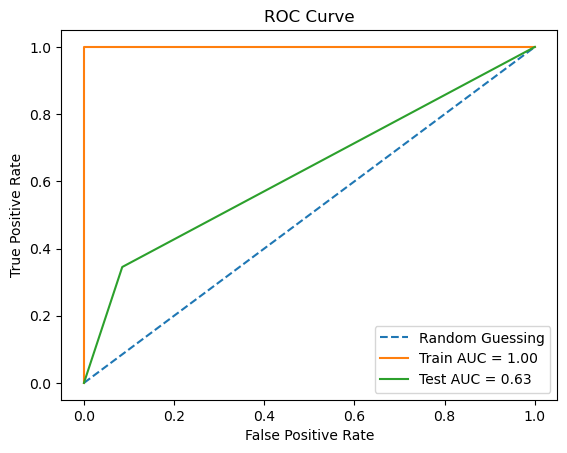

In [78]:
train_auc_KNN = roc_auc_score(y_train_scaled, y_predict_train_KNN) 
test_auc_KNN = roc_auc_score(y_test_scaled, y_predict_test_KNN)

fpr_train_KNN, tpr_train_KNN, _ = roc_curve(y_train_scaled, y_predict_train_KNN)
fpr_test_KNN, tpr_test_KNN, _ = roc_curve(y_test_scaled, y_predict_test_KNN)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_KNN, tpr_train_KNN, label=f'Train AUC = {train_auc_KNN:.2f}')
plt.plot(fpr_test_KNN, tpr_test_KNN, label=f'Test AUC = {test_auc_KNN:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

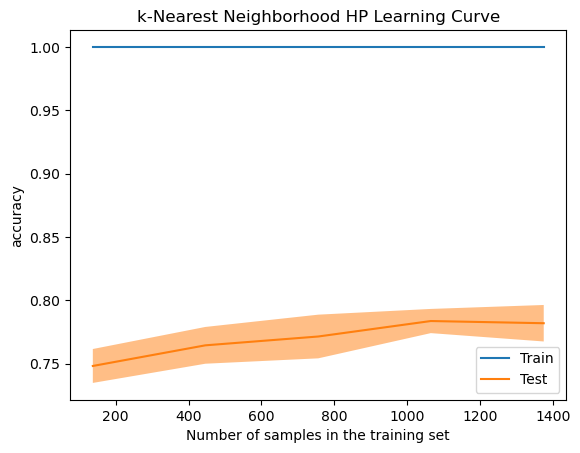

In [79]:
plot_learning_curve(modelKNN, "k-Nearest Neighborhood HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       259
           1       0.73      0.35      0.47       171

    accuracy                           0.69       430
   macro avg       0.70      0.63      0.62       430
weighted avg       0.70      0.69      0.66       430



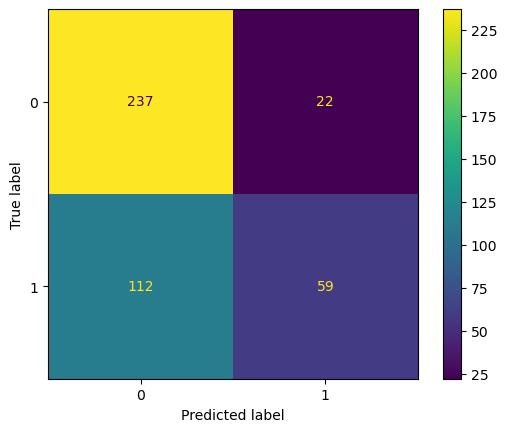

In [80]:
print(classification_report(y_test_scaled, y_predict_test_KNN))

ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_predict_test_KNN)).plot()
plt.show()

## **7. Ada Boost**

### **a. Before Hyperparameter Tuning**

#### **1) Model Fitting & Predict Features with Cross Validation Score**

In [81]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train_scaled, y_train_scaled)

y_pred_train_ab = model_ab.predict(X_train_scaled)
y_pred_test_ab = model_ab.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(model_ab, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9889484032815783


#### **2) ROC Curve**

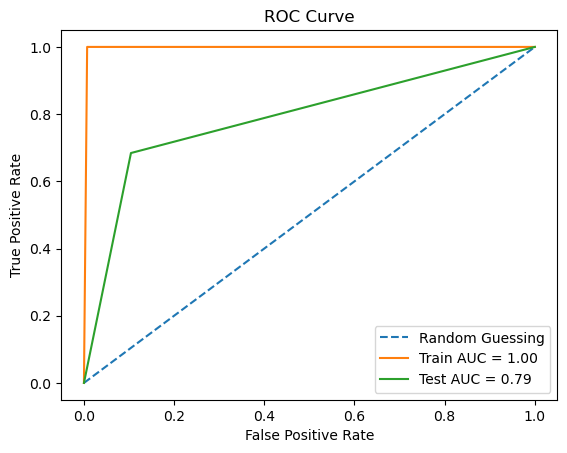

In [82]:
train_auc_ab = roc_auc_score(y_train_scaled, y_pred_train_ab )
test_auc_ab = roc_auc_score(y_test_scaled, y_pred_test_ab)

# Calculate ROC curve for train and test sets
fpr_train_ab, tpr_train_ab, _ = roc_curve(y_train_scaled, y_pred_train_ab)
fpr_test_ab, tpr_test_ab, _ = roc_curve(y_test_scaled, y_pred_test_ab)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_ab, tpr_train_ab, label=f'Train AUC = {train_auc_ab:.2f}')
plt.plot(fpr_test_ab, tpr_test_ab, label=f'Test AUC = {test_auc_ab:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **3) Learning Curve**

<Figure size 640x480 with 0 Axes>

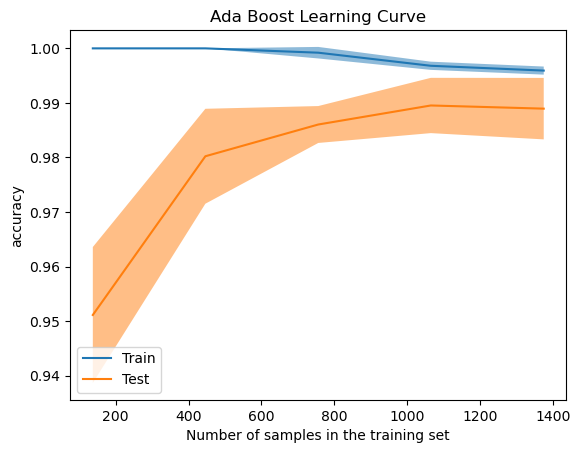

In [83]:
plot_learning_curve(model_ab, "Ada Boost", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **4) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       259
           1       0.81      0.68      0.74       171

    accuracy                           0.81       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.81      0.81      0.81       430



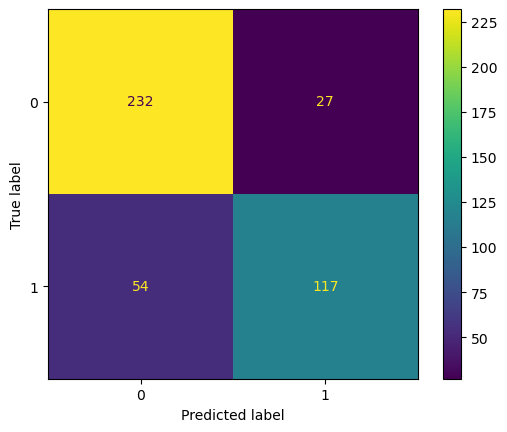

In [84]:
print(classification_report(y_test_scaled, y_pred_test_ab))
ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_pred_test_ab)).plot()
plt.show()

### **b. After Hyperparameter Tuning**

#### **1) Tuning the Hyperparameters of An Estimator**

In [85]:
ab_param_grid = {'n_estimators' : np.arange(1, 30, 1),
                  'learning_rate': uniform(0.001, 5),
                  'algorithm': ['SAMME', 'SAMME.R'],}

ab_grid = RandomizedSearchCV(model_ab, ab_param_grid, verbose=1, cv=cv, n_jobs=-1, n_iter=250)

ab_grid.fit(X_train_scaled, y_train_scaled)

print("Best Estimator: ", ab_grid.best_estimator_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best Estimator:  AdaBoostClassifier(learning_rate=1.1866863319867205, n_estimators=25)


#### **2) Model Fitting & Predict Features with Cross Validation Score**

In [86]:
modelAB = ab_grid.best_estimator_
modelAB.fit(X_train_scaled, y_train_scaled)

y_predict_train_AB = modelAB.predict(X_train_scaled)
y_predict_test_AB = modelAB.predict(X_test_scaled)

print("Cross Validation Score: ", cross_val_score(modelAB, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9895297986304156


#### **3) ROC Curve**

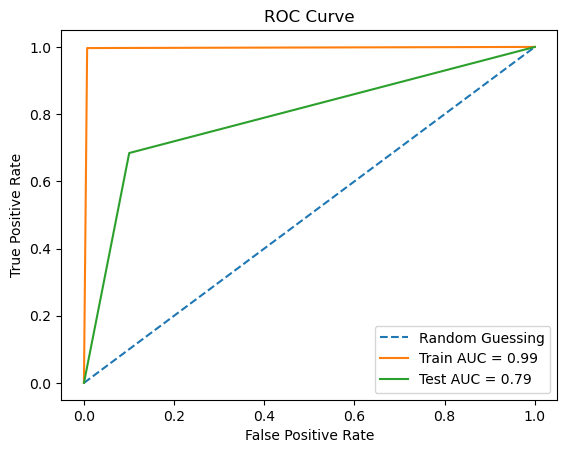

In [87]:
train_auc_AB = roc_auc_score(y_train_scaled, y_predict_train_AB) 
test_auc_AB = roc_auc_score(y_test_scaled, y_predict_test_AB)

# Calculate ROC curve for train and test sets
fpr_train_AB, tpr_train_AB, _ = roc_curve(y_train_scaled, y_predict_train_AB)
fpr_test_AB, tpr_test_AB, _ = roc_curve(y_test_scaled, y_predict_test_AB)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_AB, tpr_train_AB, label=f'Train AUC = {train_auc_AB:.2f}')
plt.plot(fpr_test_AB, tpr_test_AB, label=f'Test AUC = {test_auc_AB:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### **4) Learning Curve**

<Figure size 640x480 with 0 Axes>

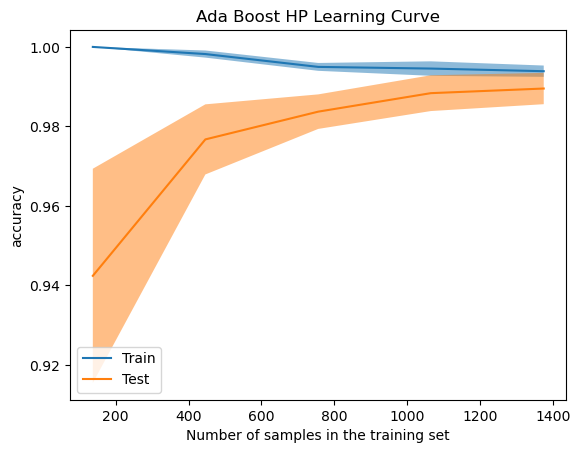

In [88]:
plot_learning_curve(modelAB, "Ada Boost HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

#### **5) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       259
           1       0.82      0.68      0.75       171

    accuracy                           0.81       430
   macro avg       0.82      0.79      0.80       430
weighted avg       0.81      0.81      0.81       430



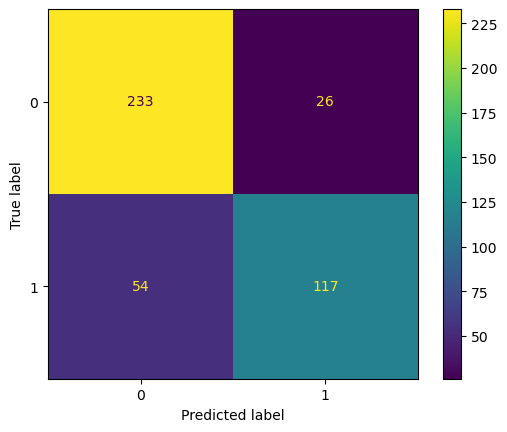

In [89]:
print(classification_report(y_test_scaled, y_predict_test_AB))

ConfusionMatrixDisplay(confusion_matrix(y_test_scaled, y_predict_test_AB)).plot()
plt.show()

## **8. Neural Network**

### **1) Set the Neural Network**

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

nn = Sequential()
nn.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) 
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

# compile the model
nn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

history = nn.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6041 - loss: 2.1704 - val_accuracy: 0.6628 - val_loss: 0.6503
Epoch 2/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.6561 - val_accuracy: 0.6541 - val_loss: 0.6191
Epoch 3/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - loss: 0.6431 - val_accuracy: 0.6076 - val_loss: 0.6568
Epoch 4/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6326 - val_accuracy: 0.6686 - val_loss: 0.6137
Epoch 5/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - loss: 0.6075 - val_accuracy: 0.6831 - val_loss: 0.6421
Epoch 6/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6137 - val_accuracy: 0.7093 - val_loss: 0.5553
Epoch 7/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - loss: 0.5976 - val_accuracy: 0.7238 - val_loss: 0.5298
Epoch 8/80
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.5710 - val_accuracy: 0.

### **2) Training and Validation Loss**

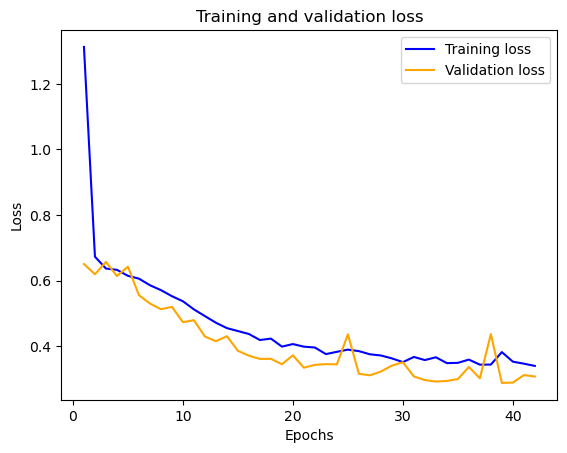

In [116]:
history_dict = history.history

loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **3) Learning Curve**

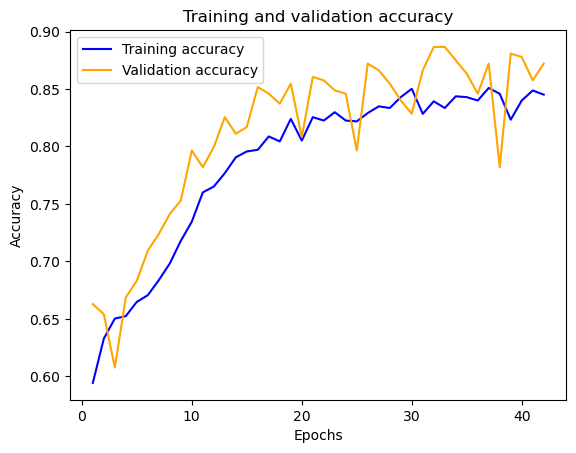

In [117]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **4) Fit & Predict**

In [118]:
nn.predict(X_test)
np.round(nn.predict(X_test),0) 

y_pred_train_nn = np.round(nn.predict(X_train),0)
y_pred_test_nn = np.round(nn.predict(X_test),0)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


### **5) ROC Curve**

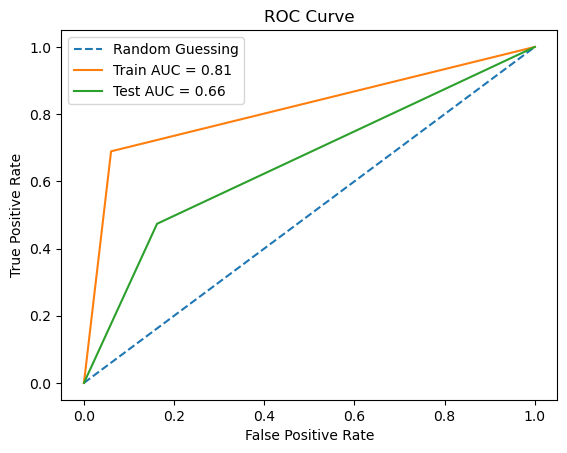

In [119]:
train_auc_nn = roc_auc_score(y_train, y_pred_train_nn) 
test_auc_nn = roc_auc_score(y_test, y_pred_test_nn)

# Calculate ROC curve for train and test sets
fpr_train_nn, tpr_train_nn, _ = roc_curve(y_train, y_pred_train_nn)
fpr_test_nn, tpr_test_nn, _ = roc_curve(y_test, y_pred_test_nn)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_nn, tpr_train_nn, label=f'Train AUC = {train_auc_nn:.2f}')
plt.plot(fpr_test_nn, tpr_test_nn, label=f'Test AUC = {test_auc_nn:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### **6) Classification Report & Confusion Matrix**

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       259
           1       0.66      0.47      0.55       171

    accuracy                           0.69       430
   macro avg       0.68      0.66      0.66       430
weighted avg       0.69      0.69      0.68       430



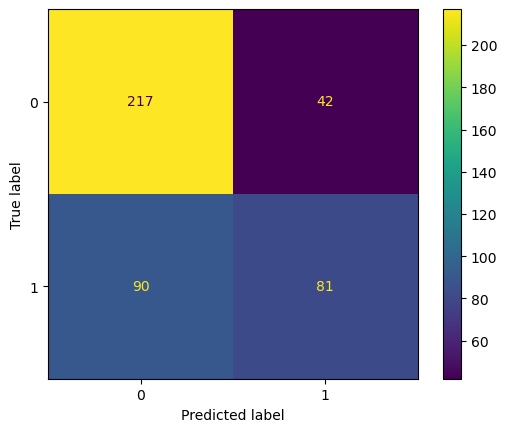

In [120]:
print(classification_report(y_test, y_pred_test_nn))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_nn)).plot()
plt.show()

# **E. Comparation Models**


## **1) Metrics Comparison for Classification Models**

In [121]:
from sklearn.metrics import precision_recall_fscore_support

models = ['XGBoost', 'Random Forest', 'Logistic Regression', 'Naive Bayes',
          'Support Vector Machines', 'k-Nearest Neighbors', 'Ada Boost', 'Neural Network']

y_preds_no_hp_sc = [y_pred_test_xgb, y_pred_test_rfc, y_pred_test_lr, predict_test_nb,
                   y_pred_test_svc, y_pred_test_knn, y_pred_test_ab]
y_preds_w_hp_sc = [y_pred_test_xgb_a, y_pred_test_rfc_hp, y_pred_test_lr_hp, predict_test_nb_a,
                   y_pred_test_svc_a, y_predict_test_KNN, y_predict_test_AB]

# empty dictionary to store all metrics
metrics = {'Model': models}

# Function to calculate and store precision for each model
def calculate_precision(y_preds, metric_name):
  for y_pred in y_preds:
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_scaled, y_pred, average='weighted')
    precision *= 100
    metrics[f'{metric_name}'] = metrics.get(f'{metric_name}', []) + [f'{precision:.1f}%']

# Calculate precision for models without hyperparameter tuning
calculate_precision(y_preds_no_hp_sc, 'Precision Normal')

# Calculate precision for models with hyperparameter tuning
calculate_precision(y_preds_w_hp_sc, 'Precision With HP')

# Handle Neural Network precision separately
precision_nn, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test_nn, average='weighted')
precision_nn *= 100
metrics['Precision Normal'].append(f'{precision_nn:.1f}%')
metrics['Precision With HP'].append(f'{precision_nn:.1f}%')

# Create DataFrame from the dictionary
df_metrics = pd.DataFrame(metrics)

df_metrics.set_index('Model', inplace=True, drop=True)

# Sort DataFrame by 'Precision With HP' in descending order
df_metrics_sorted = df_metrics.sort_values(by='Precision With HP', ascending=False)

# Display the sorted DataFrame
df_metrics_sorted


Precision Normal Precision With HP
Model                                                     
Ada Boost                          81.2%             81.4%
Random Forest                      79.8%             81.2%
XGBoost                            77.4%             77.4%
Support Vector Machines            74.4%             74.4%
Naive Bayes                        73.9%             73.2%
Logistic Regression                71.9%             72.2%
k-Nearest Neighbors                66.3%             69.9%
Neural Network                     68.8%             68.8%

> *Based on the results, Ada Boost (after hyperparameter tuning) performs better than other classification algorithms for this dataset, but we will first evaluate is Ada Boost (after hyperparameter tuning) is suitable for detecting someone having alzheimer's disease?*

## **2) Cross Validation Score of the Fitted Model**

In [122]:
print("Cross Validation Score: ", cross_val_score(modelAB, X_train_scaled, y_train_scaled, cv=cv).mean())

Cross Validation Score:  0.9895297986304156


## **3) ROC Curve of the Fitted Model**

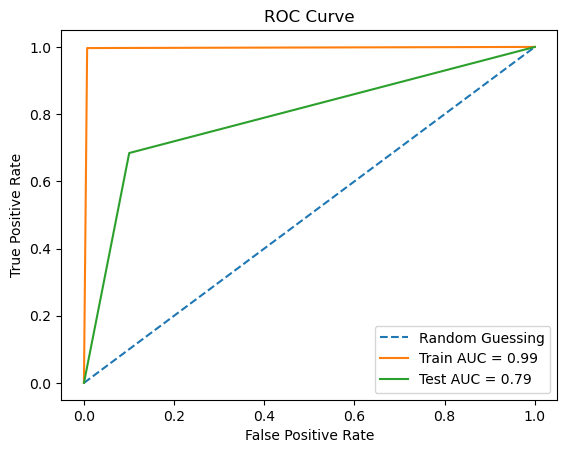

In [97]:
train_auc_AB = roc_auc_score(y_train_scaled, y_predict_train_AB) 
test_auc_AB = roc_auc_score(y_test_scaled, y_predict_test_AB)

# Calculate ROC curve for train and test sets
fpr_train_AB, tpr_train_AB, _ = roc_curve(y_train_scaled, y_predict_train_AB)
fpr_test_AB, tpr_test_AB, _ = roc_curve(y_test_scaled, y_predict_test_AB)

# Plot AUC
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr_train_AB, tpr_train_AB, label=f'Train AUC = {train_auc_AB:.2f}')
plt.plot(fpr_test_AB, tpr_test_AB, label=f'Test AUC = {test_auc_AB:.2f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **4) Learning Curve of the Fitted Model**

<Figure size 640x480 with 0 Axes>

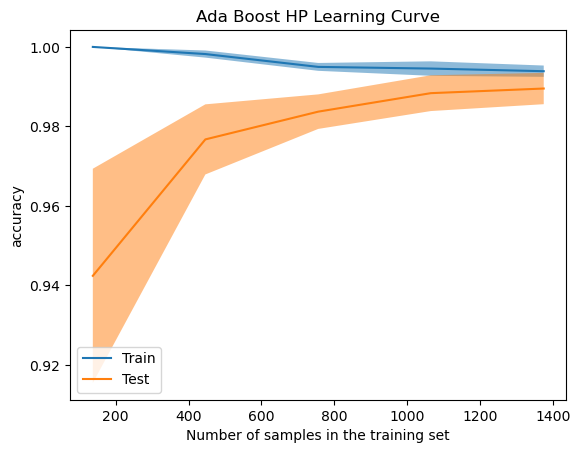

In [98]:
plot_learning_curve(modelAB, "Ada Boost HP", X_train_scaled, y_train_scaled, cv=cv, scoring='accuracy')

## **5) Classification Report & Confusion Matrix of the Fitted Model**

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       259
           1       0.82      0.68      0.75       171

    accuracy                           0.81       430
   macro avg       0.82      0.79      0.80       430
weighted avg       0.81      0.81      0.81       430



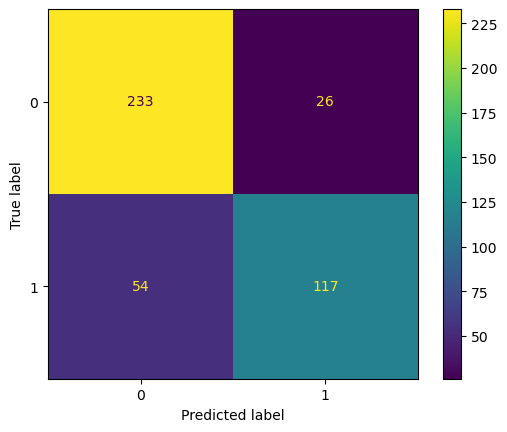

In [99]:
print(classification_report(y_test, y_predict_test_AB))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict_test_AB)).plot()
plt.show()

## **6) Parameter Estimators of the Fitted Model**

In [123]:
print("Best Estimator: ", ab_grid.best_estimator_)

Best Estimator:  AdaBoostClassifier(learning_rate=1.1866863319867205, n_estimators=25)


> *After Review, Ada Boost (after hyperparameter tuning) is completely suitable for detecting alzheimer's disease in patients so that this model can be continued to the deployment stage.*

>